In [137]:
statsC = statsapi.player_stat_data(player_id, group='hitting', type="career")
statsC

{'id': 643446,
 'first_name': 'Jeff',
 'last_name': 'McNeil',
 'active': True,
 'current_team': 'New York Mets',
 'position': '2B',
 'nickname': 'Flying Squirrel',
 'last_played': None,
 'mlb_debut': '2018-07-24',
 'bat_side': 'Left',
 'pitch_hand': 'Right',
 'stats': [{'type': 'career',
   'group': 'hitting',
   'season': None,
   'stats': {'gamesPlayed': 880,
    'groundOuts': 825,
    'airOuts': 1010,
    'runs': 416,
    'doubles': 183,
    'triples': 17,
    'homeRuns': 77,
    'strikeOuts': 404,
    'baseOnBalls': 246,
    'intentionalWalks': 11,
    'hits': 885,
    'hitByPitch': 82,
    'avg': '.286',
    'atBats': 3095,
    'obp': '.352',
    'slg': '.431',
    'ops': '.783',
    'caughtStealing': 10,
    'stolenBases': 36,
    'stolenBasePercentage': '.783',
    'groundIntoDoublePlay': 41,
    'numberOfPitches': 12256,
    'plateAppearances': 3452,
    'totalBases': 1333,
    'rbi': 346,
    'leftOnBase': 1254,
    'sacBunts': 10,
    'sacFlies': 19,
    'babip': '.307',
    

In [10]:
import numpy as np

def movingAverage(numGames, l):
    movingAverages = []
    n = len(l)

    for i in range(n):
        if i + 1 < numGames:
            # Expanding mean for the first (numGames-1) games
            movingAverages.append(np.mean(l[:i+1]))
        else:
            # Rolling mean for last numGames games
            window = l[i+1-numGames:i+1]
            movingAverages.append(np.mean(window))
    
    return movingAverages

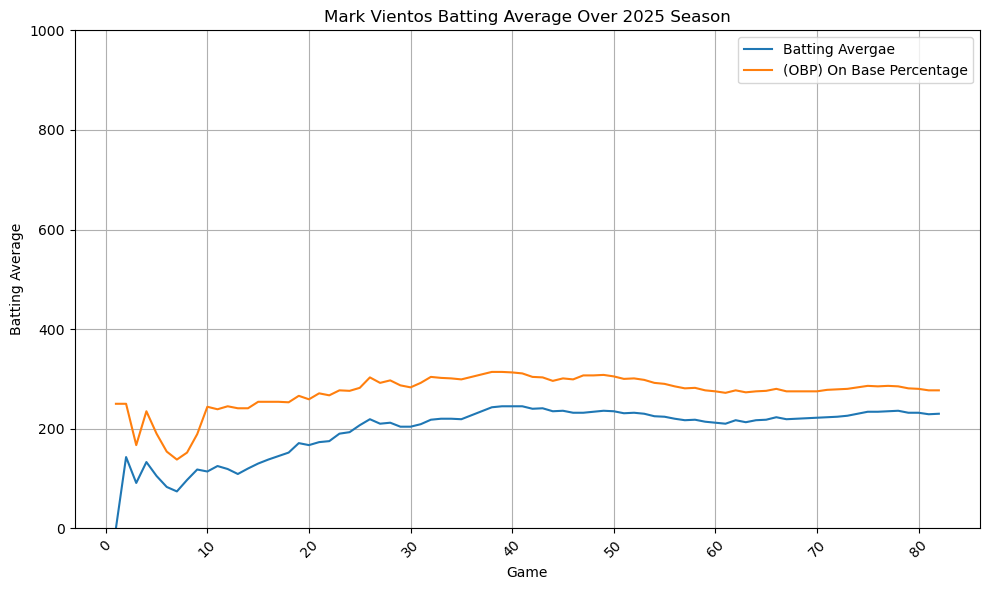

In [34]:
import statsapi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

player_name = "Mark Vientos"
player_id = statsapi.lookup_player(player_name)[0]['id']

gamelogs = statsapi.player_stat_data(player_id, group='hitting', type='gameLog')['stats']



gameNumber = []
meanBa , baPerGame = [] , []
obpPG , meanOBP = [] , []
slgPG , meanSLG = [] , []
opsPG = []

batting_averages = []
n = 0
for game in gamelogs:
    n+=1
    game_stats = game['stats']
    avg = float(game_stats.get('avg', 0)[1:])
    obp = float(game_stats.get('obp', 0)[1:])
    slg = float(game_stats.get('slg', 0)[1:])
    baPerGame.append(avg)
    obpPG.append(obp)
    slgPG.append(slg)
    OPS = obp + slg
    opsPG.append(OPS)
    # Append game data
    gameNumber.append(n)

MAList = movingAverage(10,meanBa)


df = pd.DataFrame({
    'Game Number': gameNumber,
    'BattingAverage': baPerGame,
    'OBP': obpPG,
    'SLG' : slgPG,
    'OPS': opsPG,
    
})



plt.figure(figsize=(10,6))
plt.plot(df['Game Number'], df['BattingAverage'], label = 'Batting Avergae')
plt.plot(df['Game Number'], df['OBP'], label = '(OBP) On Base Percentage')
#plt.plot(df['Game Number'], df['SLG'], label = 'SLG')
#plt.plot(df['Game Number'], df['OPS'], label = 'OPS')

plt.title(f'{player_name} Batting Average Over 2025 Season')
plt.xlabel('Game')
plt.ylabel('Batting Average')
plt.grid(True)
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [12]:
def plotFantasyPoints(player_name):
    player_id = statsapi.lookup_player(player_name)[0]['id']
    
    gamelogs = statsapi.player_stat_data(player_id, group='hitting', type='gameLog')['stats']
    
    # Scoring : Total Bases = 1, Walks = 1, Runs Scored = 1, RBI = 1, SB = 1 , K = -1
    
    
    gameNumber = []
    fpoints  = []
    
    n = 0
    for game in gamelogs:
        game_stats = game['stats']
        n+=1
        gameNumber.append(n)
        bases = int(game_stats.get('totalBases', 0))
        walks = int(game_stats.get('baseOnBalls', 0))
        runs = int(game_stats.get('runs', 0))
        rbi = int(game_stats.get('rbi', 0))
        sb = int(game_stats.get('stolenBases', 0))
        k = int(game_stats.get('strikeOuts', 0))
        fantasyPoints = bases + walks + runs + rbi + sb - k
        fpoints.append( fantasyPoints )
    
    
    MAPoints = movingAverage(5 , fpoints)
    df = pd.DataFrame({
        'Game Number': gameNumber,
        'Fantasy Points': fpoints,
        'Total Fantasy Points': np.cumsum(fpoints), 
        '10MA' : movingAverage(10, fpoints),
        '20MA' : movingAverage(20, fpoints),
        
    })
    
    totalPoints = sum(fpoints)
    sdPoints = round(np.std(fpoints) , 2)
    meanPoints = round(np.mean(fpoints),2)
    plt.figure(figsize=(10,6))
   # plt.plot(df['Game Number'], df['Total Fantasy Points'], label = 'Total Points')
    plt.plot(df['Game Number'], df['10MA'], label = 'MA: 10')
   # plt.plot(df['Game Number'], df['20MA'], label = 'MA: 20')
    plt.axhline(y = meanPoints , linestyle = '--', label = f'Season Mean : {meanPoints}', color = "black")
    plt.axhline(y = meanPoints , linestyle = '--', label = f'Total Points : {totalPoints}', color = "black", alpha = 0)
    plt.axhline(y = meanPoints , linestyle = '--', label = f'Vol. Points : {sdPoints}', color = "black", alpha = 0)

    plt.title(f'{player_name} : Fantasy Points 2025 Season')
    plt.xlabel('Game')
    plt.ylabel('Fantasy Points')
    plt.grid(True)
    plt.ylim(0, 10)
    plt.xlim(1, 100)

    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [16]:
def getTotalFantasyPoints(player_name):
    player_id = statsapi.lookup_player(player_name)[0]['id']
    
    gamelogs = statsapi.player_stat_data(player_id, group='hitting', type='gameLog')['stats']
    
    
    
    gameNumber = []
    fpoints  = []
    
    n = 0
    for game in gamelogs:
        game_stats = game['stats']
        n+=1
        gameNumber.append(n)
        bases = int(game_stats.get('totalBases', 0))
        walks = int(game_stats.get('baseOnBalls', 0))
        runs = int(game_stats.get('runs', 0))
        rbi = int(game_stats.get('rbi', 0))
        sb = int(game_stats.get('stolenBases', 0))
        k = int(game_stats.get('strikeOuts', 0))
        fantasyPoints = bases + walks + runs + rbi + sb - k
        fpoints.append( fantasyPoints )
    

    
    
    totalPoints = sum(fpoints)
    return totalPoints



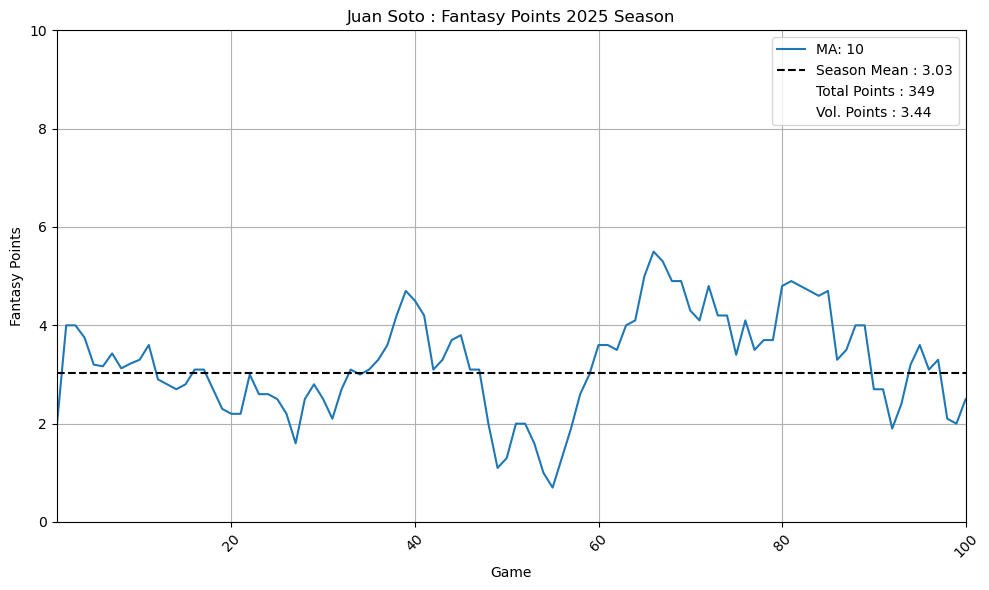

In [1440]:
plotFantasyPoints("Juan Soto")

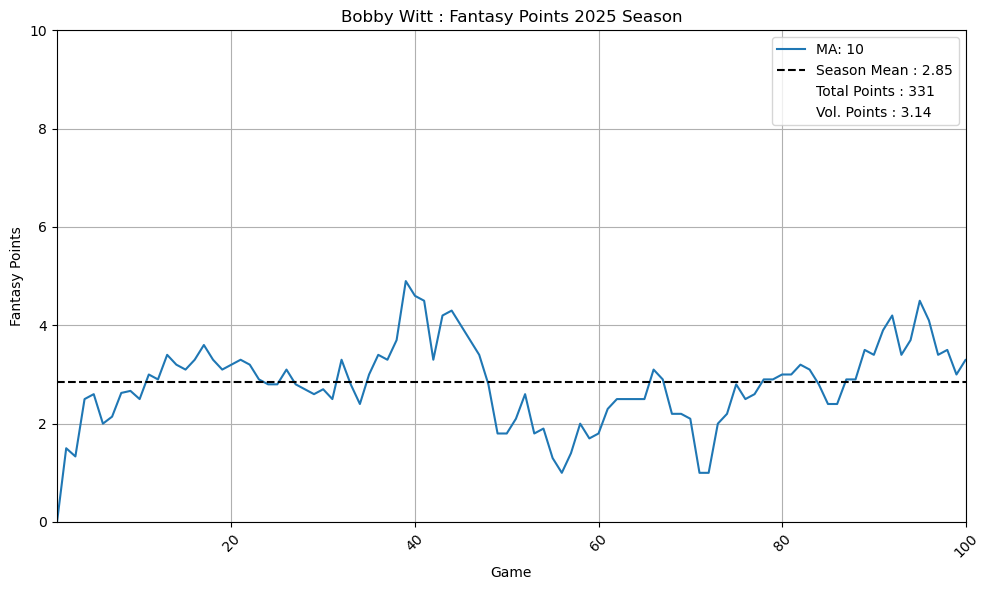

In [1442]:
plotFantasyPoints("Bobby Witt")

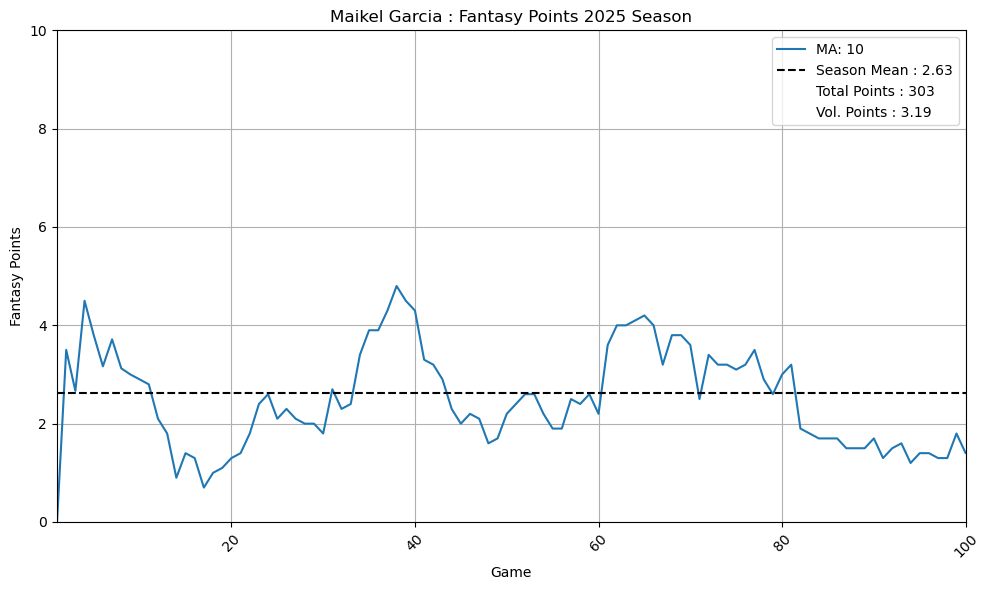

In [1444]:
plotFantasyPoints("Maikel Garcia")

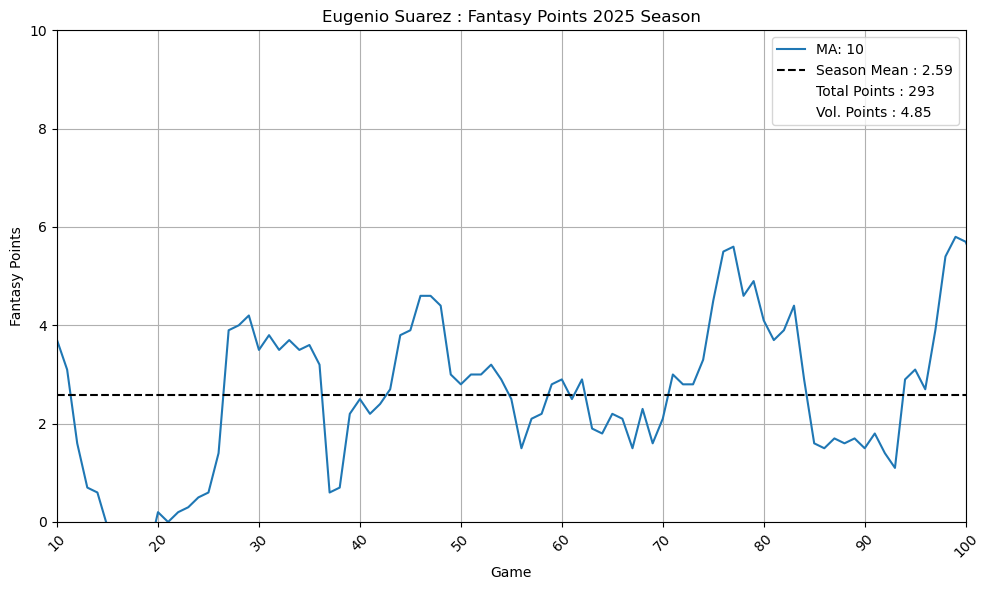

In [415]:
plotFantasyPoints("Eugenio Suarez")

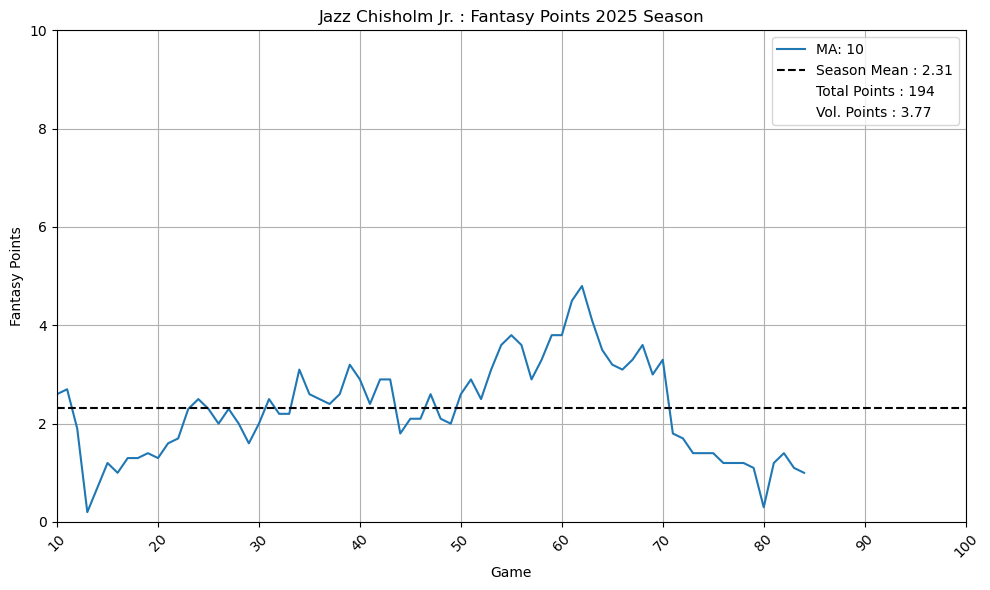

In [445]:
plotFantasyPoints("Jazz Chisholm Jr.")

In [1752]:
def getHitters(team_id):
    roster = statsapi.get('team_roster', {'teamId': team_id, 'rosterType': 'active'})
    
    hitters = []
    for player in roster['roster']:
        position = player['position']['abbreviation']
        
        if position != 'P':  # 'P' = Pitcher
            name = player['person']['fullName']
            player_id = player['person']['id']
            hitters.append(name)
    
    return hitters

def getPitchers(team_id):
    roster = statsapi.get('team_roster', {'teamId': team_id, 'rosterType': 'active'})
    
    pitchers = []
    for player in roster['roster']:
        position = player['position']['abbreviation']
        
        if 'P' in position:  # 'P' = Pitcher
            name = player['person']['fullName']
            position = player['position']['abbreviation']
            pitchers.append(name)
    
    return pitchers


In [1754]:
getPitchers(121)

['Brooks Raley',
 'Clay Holmes',
 'David Peterson',
 'Edwin Díaz',
 'Frankie Montas',
 'Gregory Soto',
 'Justin Hagenman',
 'Kodai Senga',
 'Reed Garrett',
 'Ryan Helsley',
 'Ryne Stanek',
 'Sean Manaea',
 'Tyler Rogers']

In [18]:
def getFantasyPointsRatio(player_name):
    player_id = statsapi.lookup_player(player_name)[0]['id']
    
    gamelogs = statsapi.player_stat_data(player_id, group='hitting', type='gameLog')['stats']
    
    # Scoring : Total Bases = 1, Walks = 1, Runs Scored = 1, RBI = 1, SB = 1 , K = -1
    
    
    gameNumber = []
    fpoints  = []
    
    n = 0
    for game in gamelogs:
        game_stats = game['stats']
        n+=1
        gameNumber.append(n)
        bases = int(game_stats.get('totalBases', 0))
        walks = int(game_stats.get('baseOnBalls', 0))
        runs = int(game_stats.get('runs', 0))
        rbi = int(game_stats.get('rbi', 0))
        sb = int(game_stats.get('stolenBases', 0))
        k = int(game_stats.get('strikeOuts', 0))
        fantasyPoints = bases + walks + runs + rbi + sb - k
        fpoints.append(fantasyPoints)
        
    return round(100 * np.mean(fpoints) / np.std(fpoints) , 2)
         
    

    

In [480]:
teamsAPI = statsapi.get('teams', {'sportId': 1})['teams'] 

teams = [team['id'] for team in teamsAPI]
allHitters = []

for team in teams:
    allHitters += getHitters(team)

print(allHitters)


['Brent Rooker', 'Carlos Cortes', 'Colby Thomas', 'Darell Hernaiz', 'Gio Urshela', 'JJ Bleday', 'Lawrence Butler', 'Luis Urías', 'Max Schuemann', 'Nick Kurtz', 'Shea Langeliers', 'Tyler Soderstrom', 'Willie MacIver', 'Alexander Canario', 'Andrew McCutchen', 'Bryan Reynolds', 'Henry Davis', 'Isiah Kiner-Falefa', 'Jack Suwinski', 'Jared Triolo', 'Joey Bart', 'Liover Peguero', 'Nick Gonzales', 'Oneil Cruz', 'Spencer Horwitz', 'Tommy Pham', 'Bryce Johnson', 'Elias Díaz', 'Fernando Tatis Jr.', 'Freddy Fermin', 'Gavin Sheets', 'Jackson Merrill', 'Jake Cronenworth', 'Jose Iglesias', 'Luis Arraez', 'Manny Machado', 'Ramón Laureano', "Ryan O'Hearn", 'Xander Bogaerts', 'Cal Raleigh', 'Cole Young', 'Dominic Canzone', 'Donovan Solano', 'Dylan Moore', 'Eugenio Suárez', 'J.P. Crawford', 'Jorge Polanco', 'Josh Naylor', 'Julio Rodríguez', 'Miles Mastrobuoni', 'Mitch Garver', 'Randy Arozarena', 'Andrew Knizner', 'Casey Schmitt', 'Christian Koss', 'Dominic Smith', 'Grant McCray', 'Heliot Ramos', 'Jerar 

In [482]:

df = pd.DataFrame({
        'Name': allHitters,
    })
df['FP Ratio'] = df['Name'].apply(getFantasyPointsRatio)

df

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice



,Name,FP Ratio
0,Brent Rooker,69.69
1,Carlos Cortes,93.70
2,Colby Thomas,5.22
3,Darell Hernaiz,96.94
4,Gio Urshela,45.58
...,...,...
385,Mark Vientos,48.31
386,Pete Alonso,62.27
387,Ronny Mauricio,43.92
388,Starling Marte,59.15


In [484]:
df.sort_values(by = "FP Ratio", ascending = False)

,Name,FP Ratio
224,Connor Kaiser,inf
123,Luke Keaschall,147.04
116,Vladimir Guerrero Jr.,105.02
175,Jakob Marsee,104.88
34,Luis Arraez,101.94
...,...,...
145,Jonathan Ornelas,-44.72
159,Corey Julks,-100.00
40,Cole Young,NaN
154,Sandy León,NaN


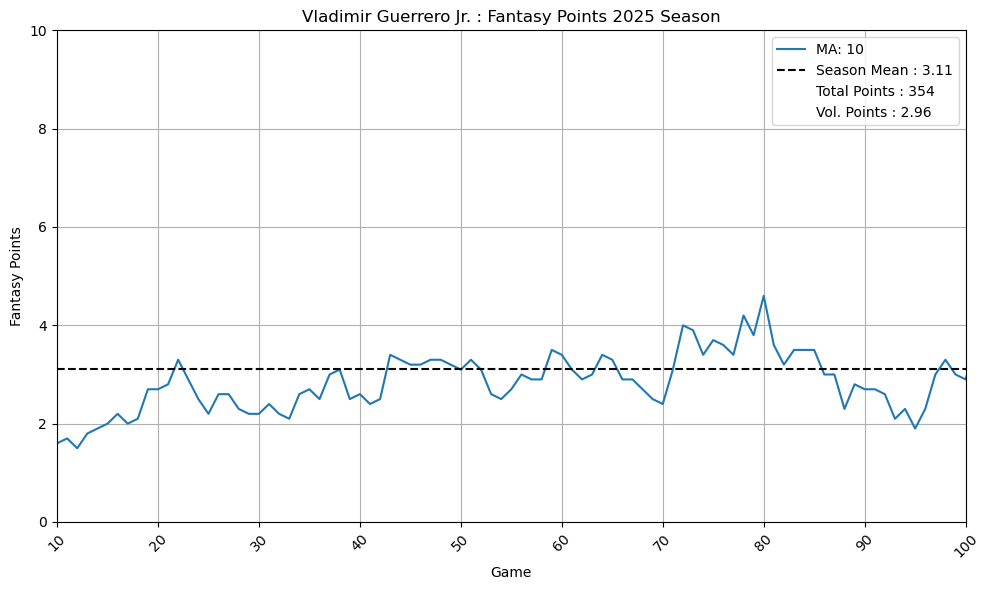

In [486]:
plotFantasyPoints("Vladimir Guerrero Jr.")

In [20]:
def getGamesPlayed(player_name):
    player_id = statsapi.lookup_player(player_name)[0]['id']
    
    stats = statsapi.player_stat_data(player_id, group='hitting', type='season', season = 2025)['stats']
    
    if stats and stats[0]['stats'].get('gamesPlayed'):
        return int(stats[0]['stats']['gamesPlayed'])
    else:
        return 0  # In case no data or no games
    
         

In [534]:
df["Games Played"] = df['Name'].apply(getGamesPlayed)
df

,Name,FP Ratio,Games Played
0,Brent Rooker,69.69,117
1,Carlos Cortes,93.70,11
2,Colby Thomas,5.22,16
3,Darell Hernaiz,96.94,8
4,Gio Urshela,45.58,53
...,...,...,...
385,Mark Vientos,48.31,81
386,Pete Alonso,62.27,115
387,Ronny Mauricio,43.92,41
388,Starling Marte,59.15,66


In [544]:
df.sort_values(by = 'FP Ratio', ascending = False, inplace = True)
dfSorted = df[df['Games Played'] > 45]
dfSorted

,Name,FP Ratio,Games Played
116,Vladimir Guerrero Jr.,105.02,114
34,Luis Arraez,101.94,109
268,Nico Hoerner,95.74,110
309,Tyler Freeman,95.04,70
79,Chandler Simpson,94.89,67
...,...,...,...
327,Chas McCormick,24.25,50
67,Garrett Hampson,23.02,48
375,Riley Adams,22.07,48
94,Ezequiel Duran,18.89,49


In [552]:
np.mean(dfSorted["FP Ratio"])

59.353993288590594

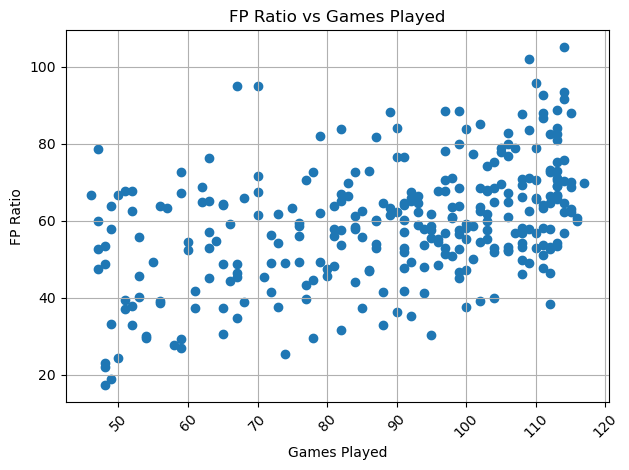

In [570]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x = dfSorted["Games Played"], y = dfSorted["FP Ratio"])
ax.set(xlabel = "Games Played" , ylabel = "FP Ratio", title = "FP Ratio vs Games Played")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()





In [22]:
import statsapi
import pandas as pd

def get_game_log_real(player_name):
    
    player_id = statsapi.lookup_player(player_name)[0]['id']

    data = statsapi.get("person", {
        "personId": player_id,
        "hydrate": "stats(group=[hitting],type=[gameLog])"
    })

    try:
        splits = data['people'][0]['stats'][0]['splits']
    except (KeyError, IndexError):
        raise ValueError("No game log data found.")

    rows = []
    for game in splits:
        date = pd.to_datetime(game['date'])
        stat = game['stat']
        bases = int(stat.get('totalBases', 0))
        walks = int(stat.get('baseOnBalls', 0))
        runs = int(stat.get('runs', 0))
        rbi = int(stat.get('rbi', 0))
        sb = int(stat.get('stolenBases', 0))
        k = int(stat.get('strikeOuts', 0))
        fantasyPoints = bases + walks + runs + rbi + sb - k
        
        rows.append({'Date': date, f'{player_name}': fantasyPoints})
        
    df =  pd.DataFrame(rows)
    df[f'{player_name} 10 Day MA'] = movingAverage(10, list(df[player_name]))
    df.drop(columns = [player_name], inplace = True)
    
    return df


def get_2playerDF(player_name1,player_name2):
    return pd.merge(get_game_log_real(player_name1) , get_game_log_real(player_name2))





In [707]:
dfYankees = pd.DataFrame({
        'Name': list(getHitters(147)),
    })

dfYankees['Games Played'] = dfYankees['Name'].apply(getGamesPlayed)
dfYankees = dfYankees[dfYankees['Games Played'] > 100]
dfYankees





,Name,Games Played
0,Aaron Judge,105
2,Anthony Volpe,114
5,Cody Bellinger,106
10,Paul Goldschmidt,108
11,Ryan McMahon,112


In [709]:
YankeeHitters = list(dfYankees['Name'])
print(YankeeHitters)

['Aaron Judge', 'Anthony Volpe', 'Cody Bellinger', 'Paul Goldschmidt', 'Ryan McMahon']


In [711]:
dfs = []
from functools import reduce

for yankee in YankeeHitters:
    dfs.append(get_game_log_real(yankee))

yankeeDF = reduce(lambda x, y: pd.merge(x, y, on = 'Date'), dfs)

yankeeDF



,Date,Aaron Judge,Anthony Volpe,Cody Bellinger,Paul Goldschmidt,Ryan McMahon
0,2025-03-29,26,10,13,11,0
1,2025-03-30,13,-1,1,5,-3
2,2025-04-02,-1,7,1,-2,-3
3,2025-04-03,14,1,0,1,-1
4,2025-04-06,-1,3,2,0,1
...,...,...,...,...,...,...
69,2025-07-19,3,13,8,2,6
70,2025-07-20,6,1,0,4,3
71,2025-07-22,0,0,11,0,9
72,2025-08-05,-2,2,0,0,1


In [933]:
yankeeDF.corr(numeric_only = True)

,Aaron Judge,Anthony Volpe,Cody Bellinger,Paul Goldschmidt,Ryan McMahon
Aaron Judge,1.000000,0.213631,0.104341,0.460683,-0.214225
Anthony Volpe,0.213631,1.000000,0.182170,0.169756,-0.008485
Cody Bellinger,0.104341,0.182170,1.000000,0.207041,0.174362
Paul Goldschmidt,0.460683,0.169756,0.207041,1.000000,-0.104950
Ryan McMahon,-0.214225,-0.008485,0.174362,-0.104950,1.000000


In [24]:
def getTeamDF(teamnumber):
    dfs = []
    dfTeam = pd.DataFrame({
            'Name': list(getHitters(teamnumber)),
        })
    
    dfTeam['Games Played'] = dfTeam['Name'].apply(getGamesPlayed)
    dfTeam = dfTeam[dfTeam['Games Played'] > 90]
    Hitters = list(dfTeam['Name'])

    for player in Hitters:
        dfs.append(get_game_log_real(player))
    
        teamDF = reduce(lambda x, y: pd.merge(x, y, on = 'Date'), dfs)
    teamDF['Sum'] = teamDF.select_dtypes(include='number').sum(axis=1)
    teamDF['10 Day Ma : Sum'] = movingAverage(10, teamDF['Sum'])
    teamDF.drop(columns = ['Sum'] , inplace = True)
    return teamDF
    

def getTeamDFSum(teamnumber):
    dfs = []
    dfTeam = pd.DataFrame({
            'Name': list(getHitters(teamnumber)),
        })
    
    dfTeam['Games Played'] = dfTeam['Name'].apply(getGamesPlayed)
    dfTeam = dfTeam[dfTeam['Games Played'] > 90]
    Hitters = list(dfTeam['Name'])

    for player in Hitters:
        dfs.append(get_game_log_real(player))
    
        teamDF = reduce(lambda x, y: pd.merge(x, y, on = 'Date'), dfs)
    teamDF['Sum'] = teamDF.select_dtypes(include='number').sum(axis=1)
    teamDF['10 Day Ma : Sum'] = movingAverage(10, teamDF['Sum'])
    teamDF.drop(columns = ['Sum'] , inplace = True)
    return teamDF[['Date','10 Day Ma : Sum']]
    



In [1017]:
metsDF = getTeamDF(121)
metsDF

,Date,Brandon Nimmo 10 Day MA,Brett Baty 10 Day MA,Cedric Mullins 10 Day MA,Francisco Lindor 10 Day MA,Juan Soto 10 Day MA,Pete Alonso 10 Day MA,Tyrone Taylor 10 Day MA,10 Day Ma : Sum
0,2025-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,2025-04-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2025-04-07,1.8,0.0,4.1,0.0,3.3,4.1,0.0,0.00
3,2025-04-08,2.3,0.0,3.0,2.4,3.6,4.8,0.0,0.00
4,2025-04-09,2.2,-0.7,3.1,2.6,2.9,5.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
143,2025-07-26,2.1,2.1,0.6,1.4,2.0,0.9,0.2,13.37
144,2025-07-27,2.4,2.2,0.8,1.0,2.0,0.5,-0.1,12.32
145,2025-07-29,1.6,2.1,2.7,0.9,1.8,0.2,0.2,11.30
146,2025-08-01,1.5,1.0,2.6,1.5,2.1,0.9,0.2,10.54


In [997]:
metsDF.corr(numeric_only = True)

,Brandon Nimmo 10 Day MA,Brett Baty 10 Day MA,Cedric Mullins 10 Day MA,Francisco Lindor 10 Day MA,Juan Soto 10 Day MA,Pete Alonso 10 Day MA,Tyrone Taylor 10 Day MA,10 Day Ma : Sum
Brandon Nimmo 10 Day MA,1.000000,0.152332,0.284842,0.701777,-0.075967,0.618009,-0.000026,0.554903
Brett Baty 10 Day MA,0.152332,1.000000,-0.422284,0.209270,0.114172,-0.325968,0.293532,0.728740
Cedric Mullins 10 Day MA,0.284842,-0.422284,1.000000,0.463552,-0.457657,0.690739,-0.309378,-0.010785
Francisco Lindor 10 Day MA,0.701777,0.209270,0.463552,1.000000,-0.205738,0.684217,0.127240,0.570301
Juan Soto 10 Day MA,-0.075967,0.114172,-0.457657,-0.205738,1.000000,-0.248224,0.315595,-0.088497
Pete Alonso 10 Day MA,0.618009,-0.325968,0.690739,0.684217,-0.248224,1.000000,0.030217,0.074543
Tyrone Taylor 10 Day MA,-0.000026,0.293532,-0.309378,0.127240,0.315595,0.030217,1.000000,0.209978
10 Day Ma : Sum,0.554903,0.728740,-0.010785,0.570301,-0.088497,0.074543,0.209978,1.000000


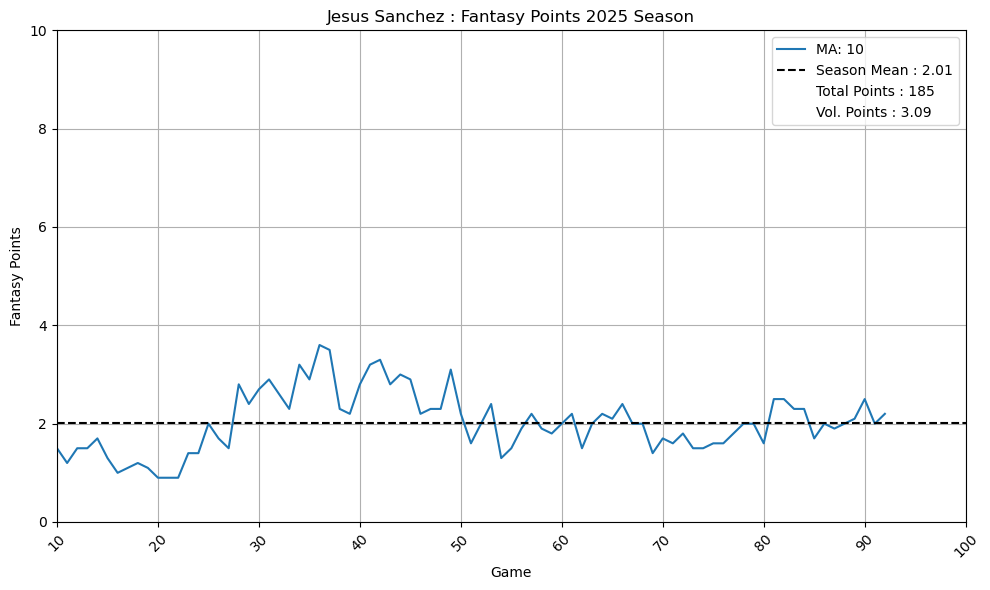

In [1015]:
plotFantasyPoints("Jesus Sanchez")

In [1084]:
from scipy.stats import pearsonr

def correlationAgainstTeam(player):
    
    player_id = statsapi.lookup_player(player)[0]['id']
    team_data = statsapi.get("person", {"personId": player_id, "hydrate": "currentTeam"})['people'][0]['currentTeam']
    team_id = team_data['id']
    teamDF = getTeamDF(team_id)
    #teamDF['Diff'] = teamDF['10 Day Ma : Sum'] - teamDF[f"{player} 10 Day MA"]
    
    correlation, p_value = pearsonr(teamDF[f"{player} 10 Day MA"], (teamDF['10 Day Ma : Sum'] - teamDF[f"{player} 10 Day MA"] ))
    correlation = round(correlation,2)
    return correlation
    

    

correlationAgainstTeam("Pete Alonso")


-0.28

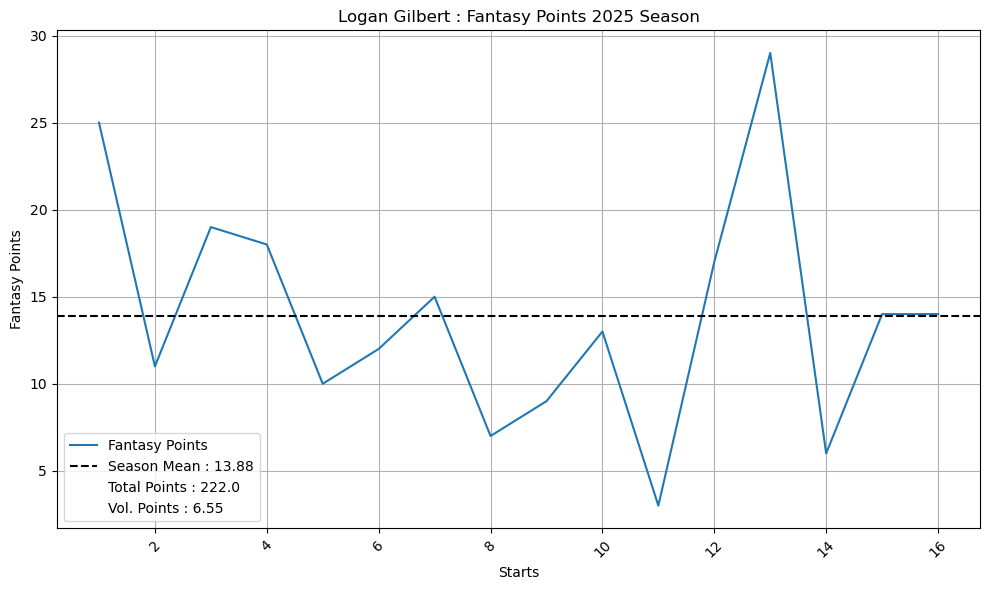

In [870]:
plotFantasyPointsPitcher('Logan Gilbert')

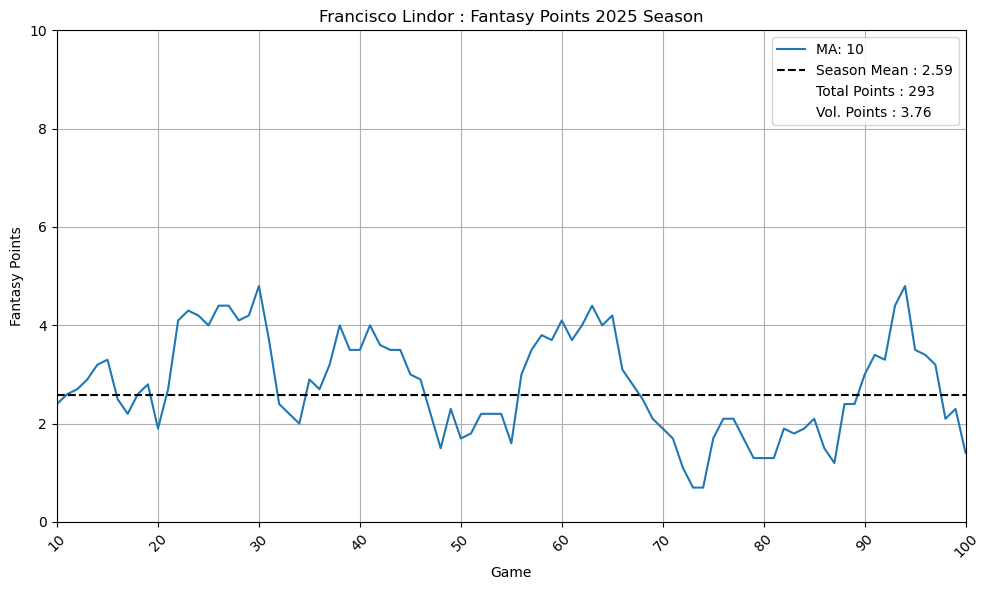

In [872]:
plotFantasyPoints("Francisco Lindor")

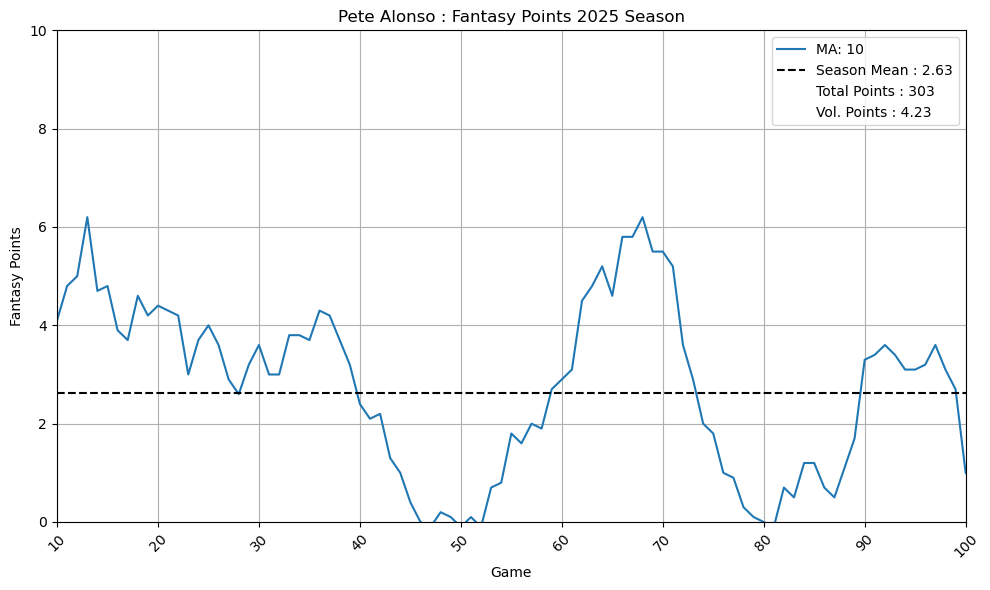

In [874]:
plotFantasyPoints("Pete Alonso")

In [900]:
PaFlDF = get_2playerDF("Francisco Lindor", "Pete Alonso")
PaFlDF

,Date,Francisco Lindor,Francisco Lindor 10 Day MA,Pete Alonso,Pete Alonso 10 Day MA
0,2025-03-27,-1,0.0,3,0.0
1,2025-03-28,-1,0.0,0,0.0
2,2025-03-29,0,0.0,-1,0.0
3,2025-04-01,2,0.0,0,0.0
4,2025-04-02,0,0.0,15,0.0
...,...,...,...,...,...
114,2025-08-02,9,2.1,12,2.2
115,2025-08-03,6,2.9,-1,2.2
116,2025-08-04,3,2.8,11,2.6
117,2025-08-05,2,2.0,2,2.8


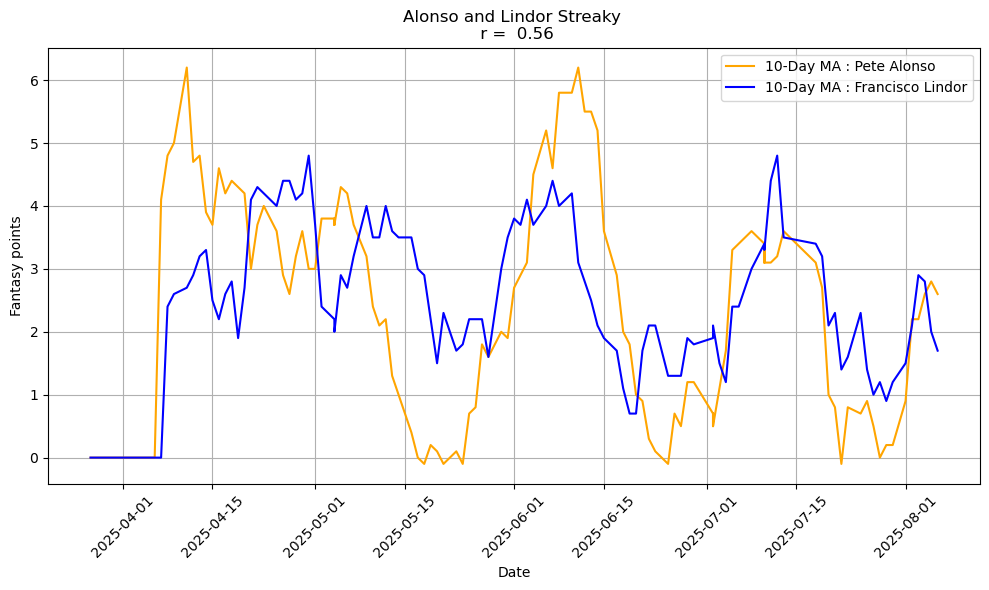

In [955]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(PaFlDF["Date"], PaFlDF["Pete Alonso 10 Day MA"], label =  "10-Day MA : Pete Alonso", color = "Orange")
ax.plot(PaFlDF["Date"], PaFlDF["Francisco Lindor 10 Day MA"], label =  "10-Day MA : Francisco Lindor", color = "Blue")


correlation, p_value = pearsonr(PaFlDF["Pete Alonso 10 Day MA"], PaFlDF["Francisco Lindor 10 Day MA"])
correlation = round(correlation,2)

ax.set(xlabel = "Date" , ylabel = 'Fantasy points', title = f"Alonso and Lindor Streaky \n r =  {correlation}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()


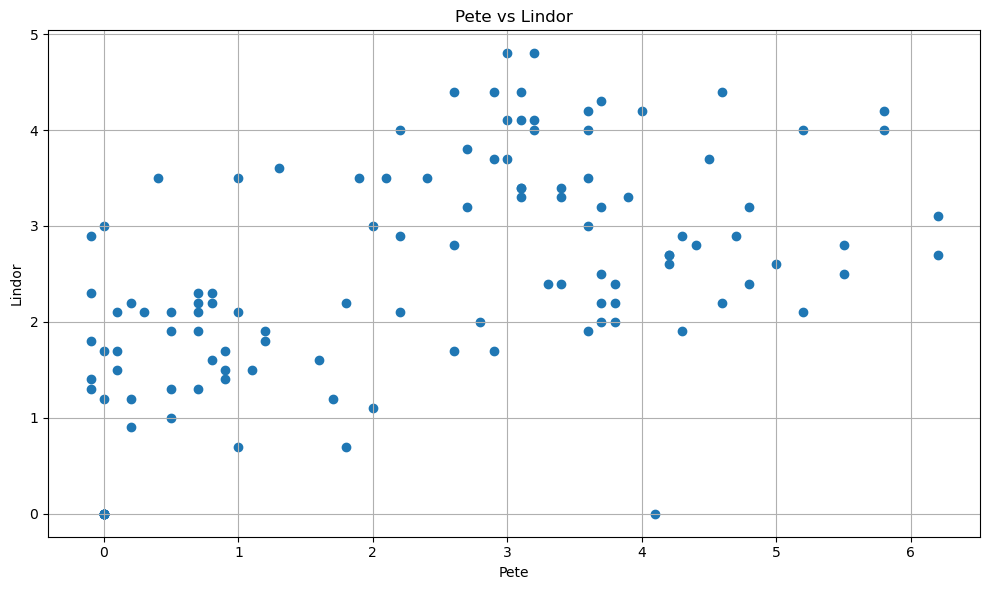

In [937]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = PaFlDF["Pete Alonso 10 Day MA"], y = PaFlDF["Francisco Lindor 10 Day MA"])
ax.set(xlabel = "Pete" , ylabel = 'Lindor', title = "Pete vs Lindor")
plt.grid(True)
plt.tight_layout()





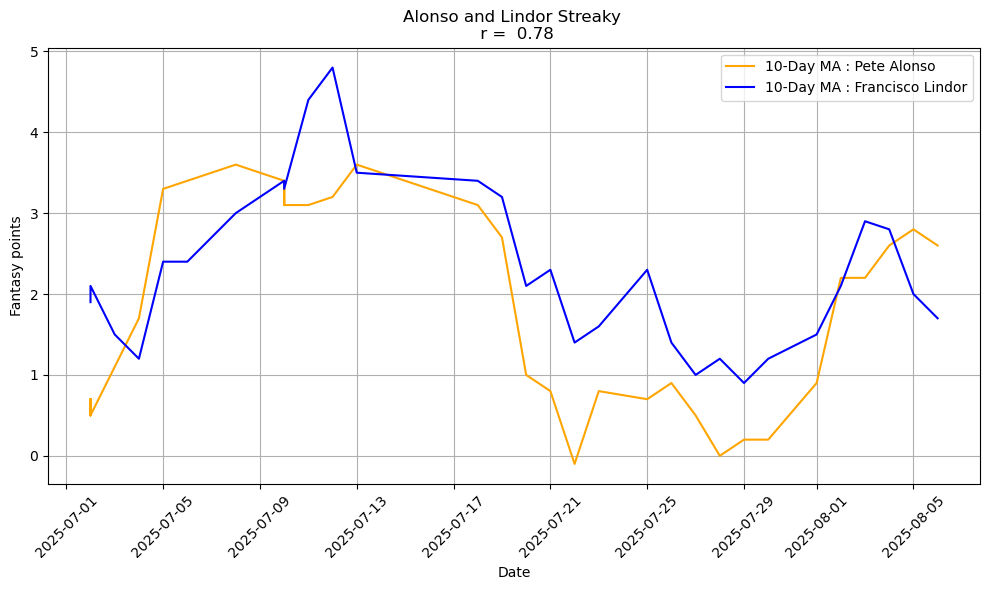

In [957]:
cutoff_date = pd.to_datetime('2025-07-01')

newPaFlDF = PaFlDF[PaFlDF['Date'] > cutoff_date ]
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(newPaFlDF["Date"], newPaFlDF["Pete Alonso 10 Day MA"], label =  "10-Day MA : Pete Alonso", color = "Orange")
ax.plot(newPaFlDF["Date"], newPaFlDF["Francisco Lindor 10 Day MA"], label =  "10-Day MA : Francisco Lindor", color = "Blue")


correlation, p_value = pearsonr(newPaFlDF["Pete Alonso 10 Day MA"], newPaFlDF["Francisco Lindor 10 Day MA"])
correlation = round(correlation,2)

ax.set(xlabel = "Date" , ylabel = 'Fantasy points', title = f"Alonso and Lindor Streaky \n r =  {correlation}")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()



In [1088]:
teamsAPI = statsapi.get('teams', {'sportId': 1})['teams'] 

teams = [team['id'] for team in teamsAPI]

def teamStats(team):
    
    teamRoster = getHitters(team)
    
    df = pd.DataFrame({
            'Name': teamRoster,
        })
    
    df['Games Played'] = df['Name'].apply(getGamesPlayed)
    df['FP Ratio'] = df['Name'].apply(getFantasyPointsRatio)
    
    
    dfSorted = df[df['Games Played'] > 90].copy()
    dfSorted["Correlation with Team"] = dfSorted['Name'].apply(correlationAgainstTeam)
    return dfSorted

MetStats = teamStats(121)
MetStats

,Name,Games Played,FP Ratio,Correlation with Team
0,Brandon Nimmo,111,58.18,0.38
1,Brett Baty,91,47.64,0.65
2,Cedric Mullins,96,55.21,-0.24
4,Francisco Lindor,113,68.92,0.40
6,Juan Soto,113,88.67,-0.34
9,Pete Alonso,115,62.27,-0.28
12,Tyrone Taylor,100,37.46,0.10


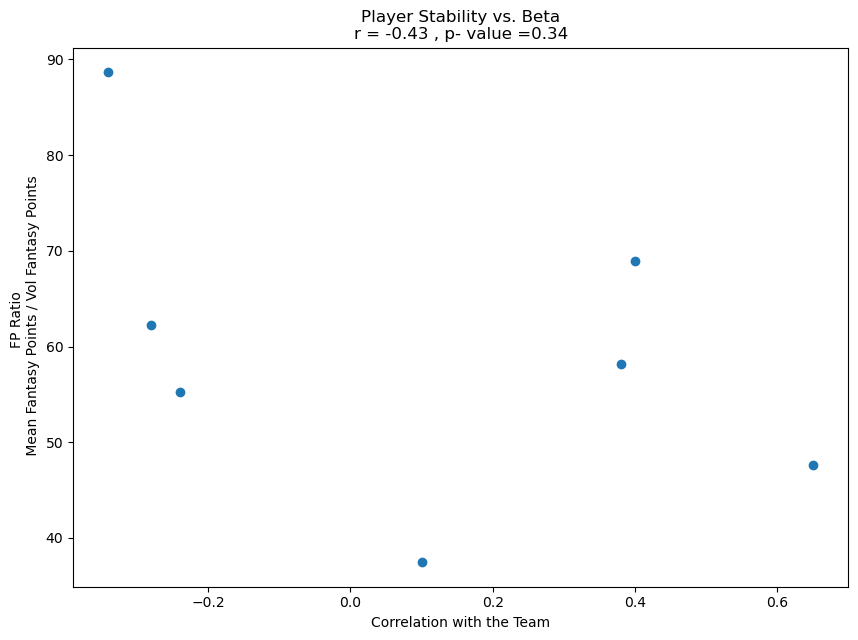

In [1100]:
fig , ax = plt.subplots(figsize = (10,7))
ax.scatter(x = MetStats["Correlation with Team"], y = MetStats["FP Ratio"])

correlation, p_value = pearsonr(MetStats["Correlation with Team"], MetStats["FP Ratio"])

correlation = round(correlation,2)
p_value = round(p_value,2)

ax.set(title = f"Player Stability vs. Beta\nr = {correlation} , p- value ={p_value}", ylabel = "FP Ratio \n Mean Fantasy Points / Vol Fantasy Points", 
       xlabel = "Correlation with the Team")

plt.show()

In [1094]:
dataframes = []
for t in teams:
    dfI = teamStats(t)
    dataframes.append(dfI)
    
MLBStats = pd.concat(dataframes, ignore_index=True)
MLBStats


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice



,Name,Games Played,FP Ratio,Correlation with Team
0,Brent Rooker,117,69.69,0.38
1,Lawrence Butler,110,53.00,-0.05
2,Tyler Soderstrom,116,59.95,0.03
3,Andrew McCutchen,100,58.43,0.40
4,Bryan Reynolds,109,47.19,-0.02
...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24
163,Francisco Lindor,113,68.92,0.40
164,Juan Soto,113,88.67,-0.34
165,Pete Alonso,115,62.27,-0.28


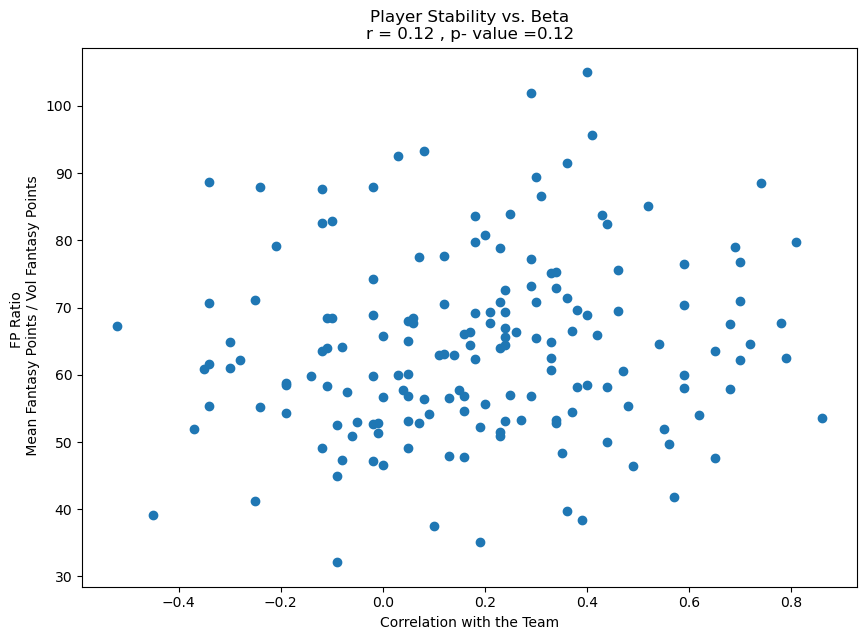

In [1102]:
fig , ax = plt.subplots(figsize = (10,7))
ax.scatter(x = MLBStats["Correlation with Team"], y = MLBStats["FP Ratio"])

correlation, p_value = pearsonr(MLBStats["Correlation with Team"], MLBStats["FP Ratio"])

correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Player Stability vs. Beta\nr = {correlation} , p- value ={p_value}", ylabel = "FP Ratio \n Mean Fantasy Points / Vol Fantasy Points", 
       xlabel = "Correlation with the Team")


plt.show()

In [1108]:
from sklearn.cluster import KMeans
def elbowchart(data, max_clusters):
    means = []
    intertias = []

    for k in range(1,max_clusters):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        intertias.append(kmeans.inertia_)

    fig , ax = plt.subplots()
    ax.plot(means , intertias, "o-")
    ax.set(xlabel = "K - means" , ylabel = "inertia" , title = "elbow chart")
    plt.grid(True)
    plt.show()

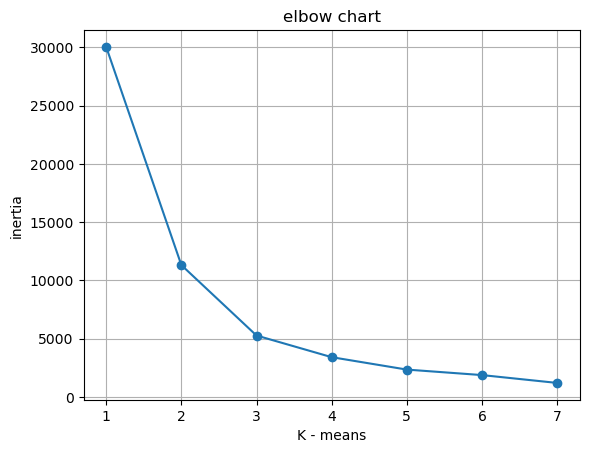

In [1120]:
elbowchart(MLBStats[["Correlation with Team" , "FP Ratio" ]], 8)

In [1126]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(MLBStats[["Correlation with Team" , "FP Ratio" ]])
MLBStats['kmeans label'] = kmeans.labels_

MLBStats

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label
0,Brent Rooker,117,69.69,0.38,2
1,Lawrence Butler,110,53.00,-0.05,1
2,Tyler Soderstrom,116,59.95,0.03,2
3,Andrew McCutchen,100,58.43,0.40,1
4,Bryan Reynolds,109,47.19,-0.02,1
...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1
163,Francisco Lindor,113,68.92,0.40,2
164,Juan Soto,113,88.67,-0.34,0
165,Pete Alonso,115,62.27,-0.28,2


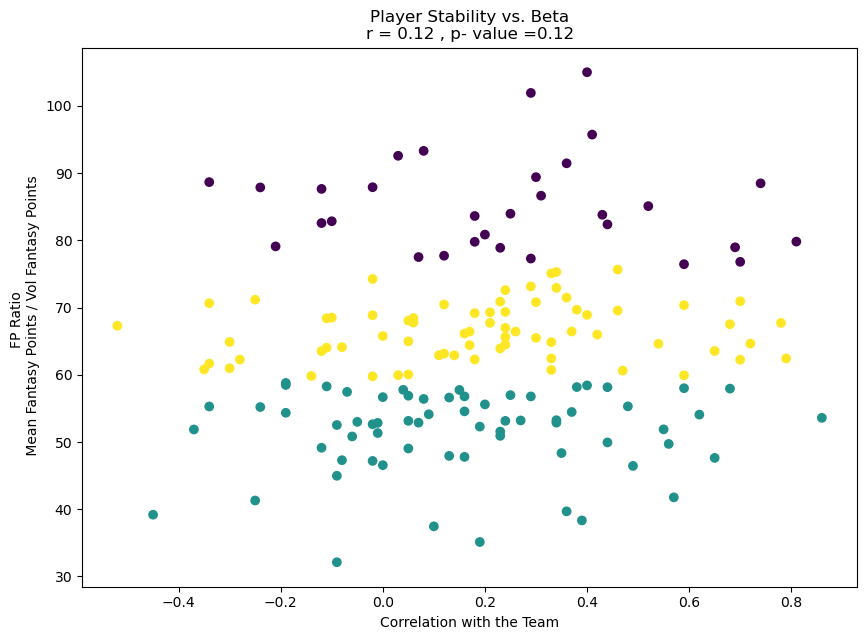

In [1128]:
fig , ax = plt.subplots(figsize = (10,7))
ax.scatter(x = MLBStats["Correlation with Team"], y = MLBStats["FP Ratio"], c = MLBStats["kmeans label"])

correlation, p_value = pearsonr(MLBStats["Correlation with Team"], MLBStats["FP Ratio"])

correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Player Stability vs. Beta\nr = {correlation} , p- value ={p_value}", ylabel = "FP Ratio \n Mean Fantasy Points / Vol Fantasy Points", 
       xlabel = "Correlation with the Team")


plt.show()

In [1138]:
print(MLBStats["FP Ratio"].mean(), MLBStats["FP Ratio"].std())
print(MLBStats["Correlation with Team"].mean(),MLBStats["Correlation with Team"].std() )


64.06724550898205 13.450882161452826
0.18766467065868264 0.2901286505411014


In [1144]:
MLBStats.sort_values(by = "FP Ratio", ascending = False)

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label
48,Vladimir Guerrero Jr.,114,105.02,0.40,0
9,Luis Arraez,109,101.94,0.29,0
106,Nico Hoerner,110,95.74,0.41,0
94,Geraldo Perdomo,114,93.32,0.08,0
120,José Ramírez,111,92.59,0.03,0
...,...,...,...,...,...
122,Nolan Jones,102,39.19,-0.45,1
79,Ryan McMahon,112,38.34,0.39,1
166,Tyrone Taylor,100,37.46,0.10,1
23,Patrick Bailey,92,35.13,0.19,1


In [1146]:
MLBStats.sort_values(by = "Correlation with Team", ascending = True)

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label
118,Carlos Santana,106,67.29,-0.52,2
122,Nolan Jones,102,39.19,-0.45,1
113,Matt McLain,105,51.87,-0.37,1
47,Ty France,106,60.81,-0.35,2
164,Juan Soto,113,88.67,-0.34,0
...,...,...,...,...,...
85,Sal Frelick,99,88.49,0.74,0
30,Masyn Winn,103,67.72,0.78,2
32,Willson Contreras,109,62.44,0.79,2
28,Brendan Donovan,106,79.82,0.81,0


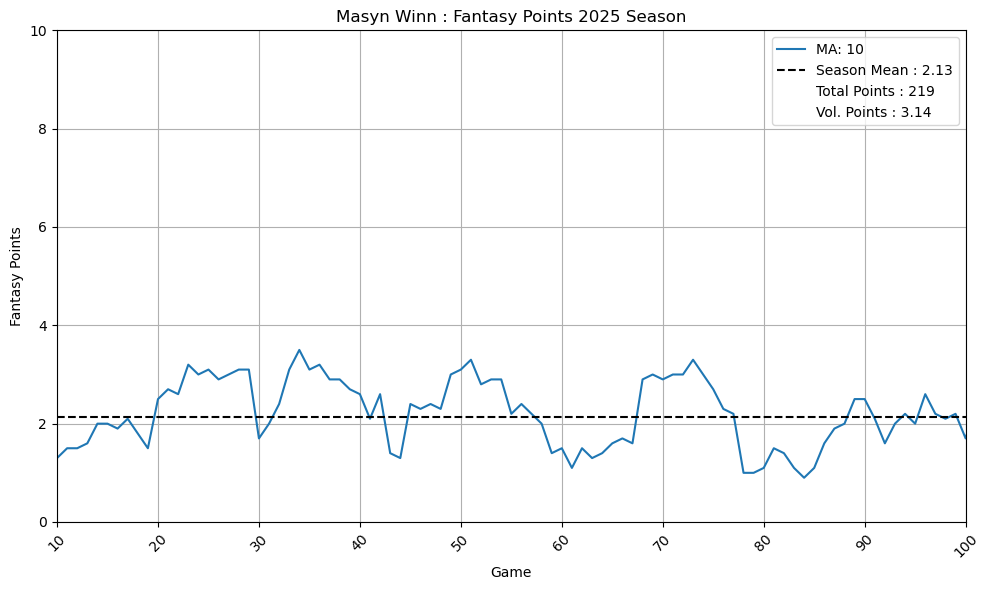

In [1152]:
plotFantasyPoints("Masyn Winn")

In [1158]:
MLBStats["Total Fantasy Points"] = MLBStats["Name"].apply(getTotalFantasyPoints)
MLBStats

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label,Total Fantasy Points
0,Brent Rooker,117,69.69,0.38,2,306
1,Lawrence Butler,110,53.00,-0.05,1,201
2,Tyler Soderstrom,116,59.95,0.03,2,260
3,Andrew McCutchen,100,58.43,0.40,1,171
4,Bryan Reynolds,109,47.19,-0.02,1,171
...,...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1,194
163,Francisco Lindor,113,68.92,0.40,2,293
164,Juan Soto,113,88.67,-0.34,0,345
165,Pete Alonso,115,62.27,-0.28,2,303


In [1162]:
sum(MLBStats['Total Fantasy Points'])

36726

In [1220]:
pointsfromtoptwenty = MLBStats[MLBStats['Total Fantasy Points'] > MLBStats['Total Fantasy Points'].quantile(0.80)]['Total Fantasy Points'].sum() / sum(MLBStats['Total Fantasy Points'])

In [1222]:
pointsfromtoptwenty

0.2854108805750694

In [1232]:
MLBStats["Mean Fantasy Points"] = MLBStats["Total Fantasy Points"] / MLBStats["Games Played"]
MLBStats["Mean Fantasy Points"] = MLBStats["Mean Fantasy Points"].round(1)


,Name,Games Played,FP Ratio,Correlation with Team,kmeans label,Total Fantasy Points,Mean Fantasy Points
0,Brent Rooker,117,69.69,0.38,2,306,2.6
1,Lawrence Butler,110,53.00,-0.05,1,201,1.8
2,Tyler Soderstrom,116,59.95,0.03,2,260,2.2
3,Andrew McCutchen,100,58.43,0.40,1,171,1.7
4,Bryan Reynolds,109,47.19,-0.02,1,171,1.6
...,...,...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1,194,2.0
163,Francisco Lindor,113,68.92,0.40,2,293,2.6
164,Juan Soto,113,88.67,-0.34,0,345,3.1
165,Pete Alonso,115,62.27,-0.28,2,303,2.6


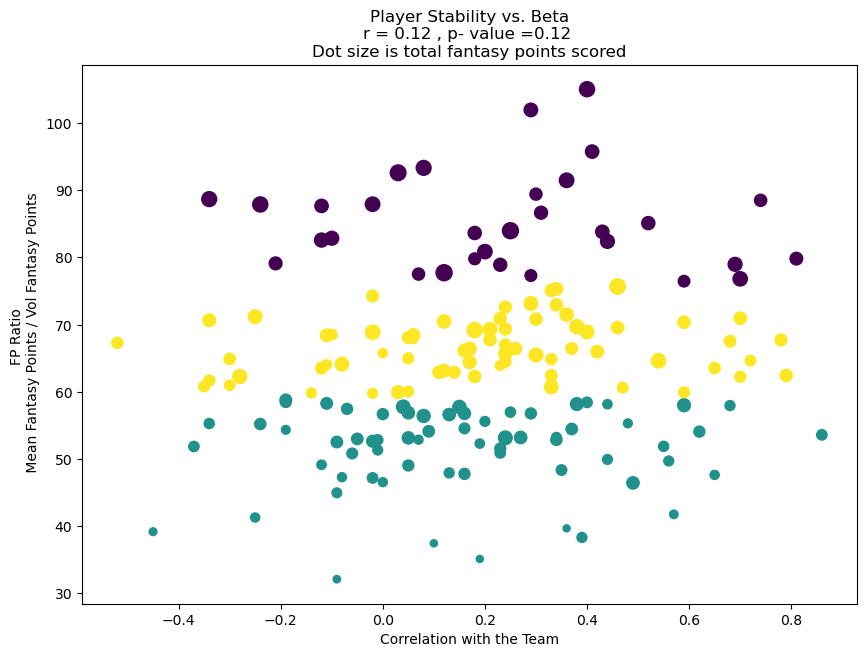

In [1246]:
fig , ax = plt.subplots(figsize = (10,7))
ax.scatter(x = MLBStats["Correlation with Team"], y = MLBStats["FP Ratio"], c = MLBStats["kmeans label"], s = (MLBStats["Total Fantasy Points"] / 3) )

correlation, p_value = pearsonr(MLBStats["Correlation with Team"], MLBStats["FP Ratio"])

correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Player Stability vs. Beta\nr = {correlation} , p- value ={p_value} \nDot size is total fantasy points scored", ylabel = "FP Ratio \n Mean Fantasy Points / Vol Fantasy Points", 
       xlabel = "Correlation with the Team")
#ax.annotate("Dot Size is equivalent to points scored", xy = (1,20))


plt.show()

In [1252]:
MLBStats["Vol"] = (100 /MLBStats["FP Ratio"]) * MLBStats["Mean Fantasy Points"]
MLBStats["Vol"]  = MLBStats["Vol"].round(2)
MLBStats

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label,Total Fantasy Points,Mean Fantasy Points,Vol
0,Brent Rooker,117,69.69,0.38,2,306,2.6,3.73
1,Lawrence Butler,110,53.00,-0.05,1,201,1.8,3.40
2,Tyler Soderstrom,116,59.95,0.03,2,260,2.2,3.67
3,Andrew McCutchen,100,58.43,0.40,1,171,1.7,2.91
4,Bryan Reynolds,109,47.19,-0.02,1,171,1.6,3.39
...,...,...,...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1,194,2.0,3.62
163,Francisco Lindor,113,68.92,0.40,2,293,2.6,3.77
164,Juan Soto,113,88.67,-0.34,0,345,3.1,3.50
165,Pete Alonso,115,62.27,-0.28,2,303,2.6,4.18


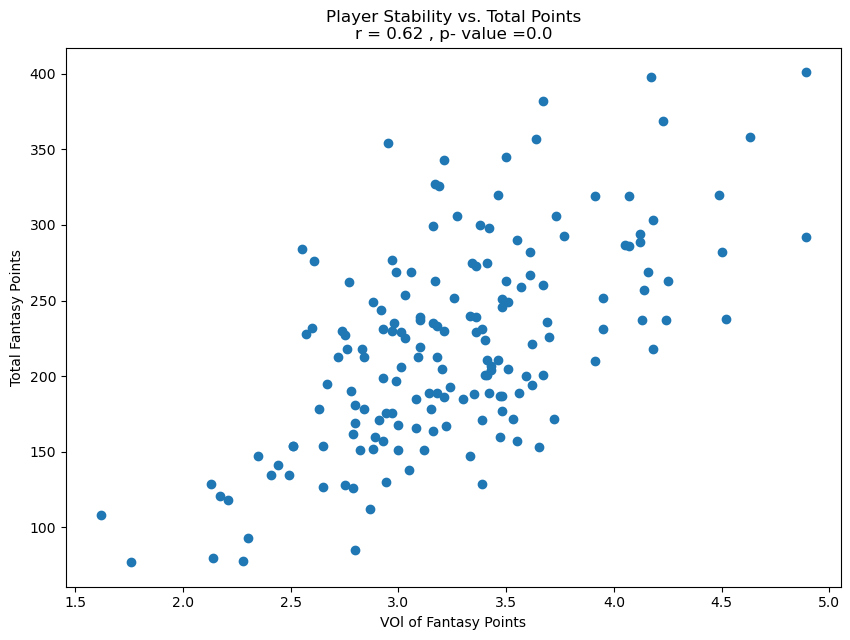

In [1254]:
fig , ax = plt.subplots(figsize = (10,7))
ax.scatter(x = MLBStats["Vol"], y = MLBStats["Total Fantasy Points"])

correlation, p_value = pearsonr(MLBStats["Vol"], MLBStats["Total Fantasy Points"])

correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Player Stability vs. Total Points\nr = {correlation} , p- value ={p_value}", xlabel = "VOl of Fantasy Points", 
       ylabel = "Total Fantasy Points")
#ax.annotate("Dot Size is equivalent to points scored", xy = (1,20))


plt.show()

In [1256]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(MLBStats[["Vol" , "Total Fantasy Points" ]])
MLBStats['kmeans label 2'] = kmeans.labels_

MLBStats

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label,Total Fantasy Points,Mean Fantasy Points,Vol,kmeans label 2
0,Brent Rooker,117,69.69,0.38,2,306,2.6,3.73,2
1,Lawrence Butler,110,53.00,-0.05,1,201,1.8,3.40,1
2,Tyler Soderstrom,116,59.95,0.03,2,260,2.2,3.67,1
3,Andrew McCutchen,100,58.43,0.40,1,171,1.7,2.91,0
4,Bryan Reynolds,109,47.19,-0.02,1,171,1.6,3.39,0
...,...,...,...,...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1,194,2.0,3.62,1
163,Francisco Lindor,113,68.92,0.40,2,293,2.6,3.77,2
164,Juan Soto,113,88.67,-0.34,0,345,3.1,3.50,2
165,Pete Alonso,115,62.27,-0.28,2,303,2.6,4.18,2


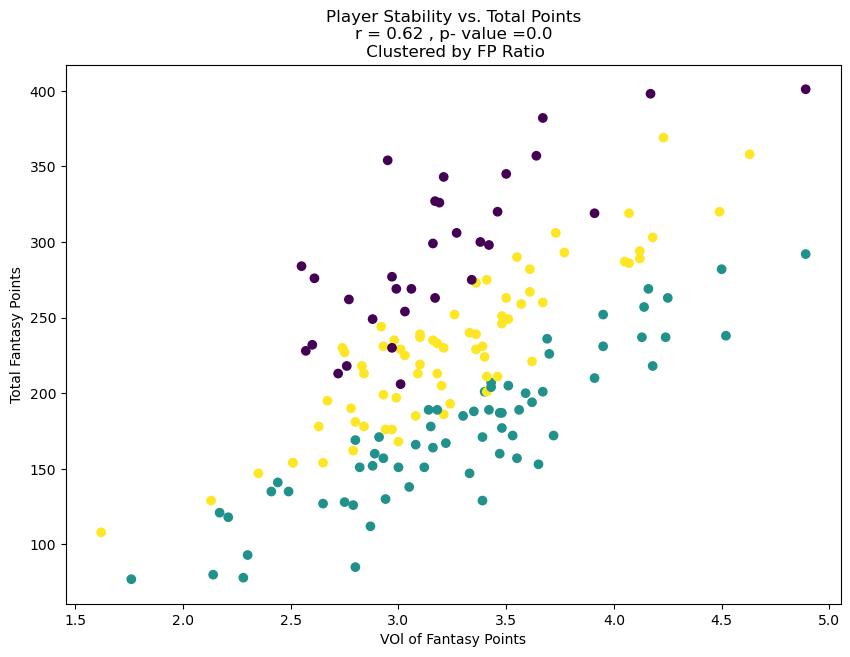

In [1274]:
fig , ax = plt.subplots(figsize = (10,7))
#plt.grid(True)
ax.scatter(x = MLBStats["Vol"], y = MLBStats["Total Fantasy Points"], c = MLBStats["kmeans label"])

correlation, p_value = pearsonr(MLBStats["Vol"], MLBStats["Total Fantasy Points"])

correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Player Stability vs. Total Points\nr = {correlation} , p-value ={p_value}\n Clustered by FP Ratio", xlabel = "VOl of Fantasy Points", 
       ylabel = "Total Fantasy Points")

plt.show()

In [1282]:
import statsapi
import pandas as pd

def average_lineup_spot(player_name: str, season = 2025) -> float:
    """
    Return the player's average batting-order position (1-9) for the given season.
    Looks up each game, reads the boxscore battingOrder, and averages across games.
    """
    # 1) Player -> ID
    player = statsapi.lookup_player(player_name)
    player_id = player[0]['id']

    # 2) Get per-game logs to collect gamePk values
    person = statsapi.get("person", {
        "personId": player_id,
        "hydrate": "stats(group=[hitting],type=[gameLog])"
    })

    # Extract the list of game logs ("splits"); filter to requested season
    splits = person['people'][0]['stats'][0].get('splits', [])
    splits = [s for s in splits if pd.to_datetime(s['date']).year == season]

    if not splits:
        raise ValueError(f"No game logs found for {player_name} in {season}.")

    game_pks = [s['game']['gamePk'] for s in splits if 'game' in s and 'gamePk' in s['game']]

    # 3) For each game, read the boxscore and capture battingOrder
    lineup_positions = []
    for pk in game_pks:
        g = statsapi.get("game", {"gamePk": pk})
        box = g['liveData']['boxscore']['teams']
        # check both sides
        for side in ('home', 'away'):
            for pdata in box[side]['players'].values():
                if pdata['person']['id'] == player_id and 'battingOrder' in pdata:
                    # battingOrder is like "101","202",... ; //100 gives 1..9
                    lineup_positions.append(int(pdata['battingOrder']) // 100)
                    break  # found this game; move to next game
            else:
                continue
            break

    if not lineup_positions:
        raise ValueError(f"No battingOrder entries found for {player_name} in {season}.")

    return sum(lineup_positions) / len(lineup_positions)


In [1284]:
avg_spot = average_lineup_spot("Juan Soto")
print(f"Average lineup spot: {avg_spot:.2f}")


Average lineup spot: 2.57


In [1286]:
MLBStats["Average Line Up Position"] = MLBStats['Name'].apply(average_lineup_spot)
MLBStats

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label,Total Fantasy Points,Mean Fantasy Points,Vol,kmeans label 2,Average Line Up Position
0,Brent Rooker,117,69.69,0.38,2,306,2.6,3.73,2,2.777778
1,Lawrence Butler,110,53.00,-0.05,1,201,1.8,3.40,1,1.881818
2,Tyler Soderstrom,116,59.95,0.03,2,260,2.2,3.67,1,4.129310
3,Andrew McCutchen,100,58.43,0.40,1,171,1.7,2.91,0,2.660000
4,Bryan Reynolds,109,47.19,-0.02,1,171,1.6,3.39,0,2.614679
...,...,...,...,...,...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1,194,2.0,3.62,1,5.822917
163,Francisco Lindor,113,68.92,0.40,2,293,2.6,3.77,2,1.283186
164,Juan Soto,113,88.67,-0.34,0,345,3.1,3.50,2,2.566372
165,Pete Alonso,115,62.27,-0.28,2,303,2.6,4.18,2,3.565217


In [1290]:
MLBStats['Average Line Up Position'] = MLBStats['Average Line Up Position'].round(1)
MLBStats

,Name,Games Played,FP Ratio,Correlation with Team,kmeans label,Total Fantasy Points,Mean Fantasy Points,Vol,kmeans label 2,Average Line Up Position
0,Brent Rooker,117,69.69,0.38,2,306,2.6,3.73,2,2.8
1,Lawrence Butler,110,53.00,-0.05,1,201,1.8,3.40,1,1.9
2,Tyler Soderstrom,116,59.95,0.03,2,260,2.2,3.67,1,4.1
3,Andrew McCutchen,100,58.43,0.40,1,171,1.7,2.91,0,2.7
4,Bryan Reynolds,109,47.19,-0.02,1,171,1.6,3.39,0,2.6
...,...,...,...,...,...,...,...,...,...,...
162,Cedric Mullins,96,55.21,-0.24,1,194,2.0,3.62,1,5.8
163,Francisco Lindor,113,68.92,0.40,2,293,2.6,3.77,2,1.3
164,Juan Soto,113,88.67,-0.34,0,345,3.1,3.50,2,2.6
165,Pete Alonso,115,62.27,-0.28,2,303,2.6,4.18,2,3.6


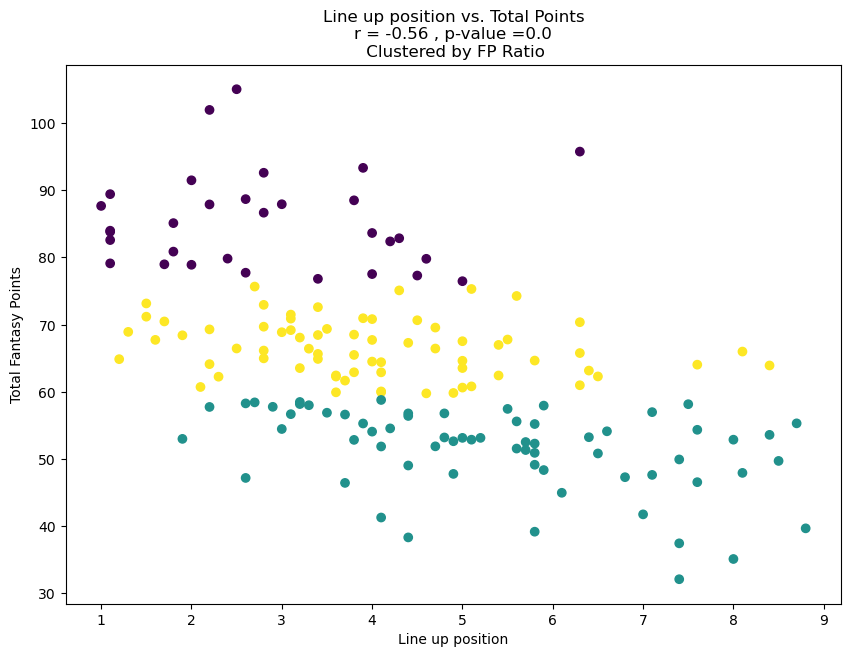

In [1298]:
fig , ax = plt.subplots(figsize = (10,7))
#plt.grid(True)
ax.scatter(x = MLBStats['Average Line Up Position'], y = MLBStats["FP Ratio"], c = MLBStats["kmeans label"])

correlation, p_value = pearsonr(MLBStats['Average Line Up Position'], MLBStats["FP Ratio"])

correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Line up position vs. Total Points\nr = {correlation} , p-value ={p_value}\n Clustered by FP Ratio", xlabel = "Line up position", 
       ylabel = "Total Fantasy Points")

plt.show()

In [28]:


def getPitchingLog(player_name: str) -> pd.DataFrame:
    player_id = statsapi.lookup_player(player_name)[0]['id']

    # Proper hydrate for game logs
    data = statsapi.get("person", {
        "personId": player_id,
        "hydrate": "stats(group=[pitching],type=[gameLog])"
    })

    # Pull the list of games (splits)
    splits = data['people'][0]['stats'][0].get('splits', [])
    if not splits:
        raise ValueError("No game log data found.")

    rows = []
    fantasyPoints = []
    for g in splits:
        stat = g.get('stat', {})

        # inningsPitched comes like "5.2" (5 innings + 2 outs)
        ip_str = stat.get('inningsPitched', '0')
        whole, _, frac = ip_str.partition('.')
        outs = int(whole) * 3 + (int(frac) if frac else 0)
        ip = outs / 3.0
        
        # pull counting stats (strings -> ints)
        er     = int(stat.get('earnedRuns',   0))
        wins   = int(stat.get('wins',         0))
        losses = int(stat.get('losses',       0))
        saves  = int(stat.get('saves',        0))
        holds  = int(stat.get('holds',        0))
        k      = int(stat.get('strikeOuts',   0))
        hits   = int(stat.get('hits',         0))
        walks  = int(stat.get('baseOnBalls',  0))

        # example scoring — adjust to your league
        fantasy = (
            3*ip + 5*wins - 5*losses + 5*saves + 3*holds
            + 1*k - 2*er - 1*hits - 1*walks
        )
        fantasyPoints.append(fantasy)
        fantMean = round(sum(fantasyPoints) / len(fantasyPoints) , 2)
        
        rows.append({
            'Date': pd.to_datetime(g['date']),
            player_name: fantasy,
            f'{player_name} Rolling Mean' : fantMean
        })

    return pd.DataFrame(rows).sort_values('Date').reset_index(drop=True)


def getPitchingMean(player_name):
    df =   getPitchingLog(player_name)
    mean =   df[player_name].mean()
    time.sleep(0.2)
    return mean 
    
def getPitchingVol(player_name):
    df =   getPitchingLog(player_name)
    vol =  df[player_name].std()
    time.sleep(0.2)
    return vol




    

In [1634]:
getPitchingLog("Zach Wheeler")

,Date,Zach Wheeler,Zach Wheeler Rolling Mean
0,2025-03-27,20.0,20.00
1,2025-04-02,31.0,25.50
2,2025-04-08,2.0,17.67
3,2025-04-13,0.0,13.25
4,2025-04-18,30.0,16.60
5,2025-04-23,16.0,16.50
6,2025-04-29,17.0,16.57
7,2025-05-06,27.0,17.88
8,2025-05-11,29.0,19.11
9,2025-05-17,25.0,19.70


In [50]:
def plotFantasyPointsPitcher(player_name):
    df = getPitchingLog(player_name)
    meanPoints = round(df[player_name].mean() ,2)
    sdPoints = round(df[player_name].std() ,2)
    totalPoints =  df[player_name].sum()
    plt.figure(figsize=(10,6))
    
   # plt.plot(df['Game Number'], df['Total Fantasy Points'], label = 'Total Points')
    plt.plot(df['Date'], df[f'{player_name} Rolling Mean'], label = 'Mean Fantasy Points', c = "Blue", alpha = 0.75)
    plt.plot(df['Date'], df[f'{player_name}'], label = 'Fantasy Points', c = "Black",  marker='o')
    
    plt.axhline(y = meanPoints , linestyle = '--', label = f'Season Mean : {meanPoints}', color = "black")
    plt.axhline(y = meanPoints , linestyle = '--', label = f'Total Points : {totalPoints}', color = "black", alpha = 0)
    plt.axhline(y = meanPoints , linestyle = '--', label = f'Vol. Points : {sdPoints}', color = "black", alpha = 0)

    plt.title(f'{player_name} : Fantasy Points 2025 Season')
    plt.xlabel('Date')
    plt.ylabel('Fantasy Points')
    plt.grid(True)


    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

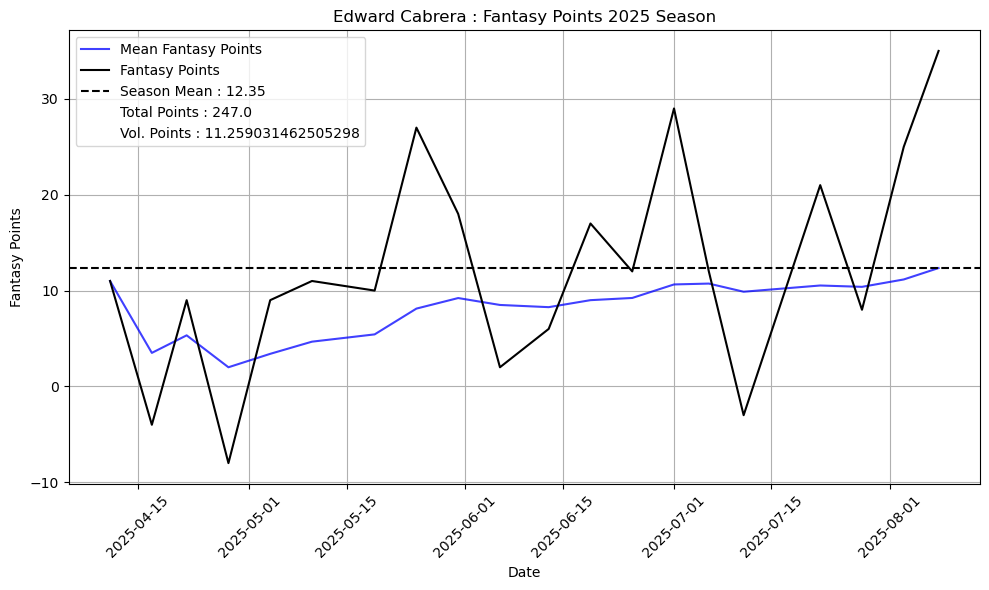

In [1347]:
plotFantasyPointsPitcher("Edward Cabrera")

In [1706]:
import pandas as pd

def baseline_mean_from_plog(p_log: pd.DataFrame, game_date: str, name: str, min_games: int = 5) -> float:
    """
    Given a pitcher log DataFrame with 'Date' and 'Points',
    returns the baseline mean BEFORE game_date:
      - If there are >= min_games prior starts: mean of the last `min_games`
      - Else: expanding mean of all prior starts
    """
    df = p_log.copy()
    df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
    gd = pd.to_datetime(game_date).normalize()

    # Filter to games before target date
    prior = df[df['Date'] < gd].sort_values('Date')
    if prior.empty:
        return None  # no prior starts

    if len(prior) >= min_games:
        return float(prior[name].tail(min_games).mean())
    else:
        return float(prior[name].mean())



def compare_change_and_pitcher_perf(team_id):
    # Step 1: Get team MA data
    df = getTeamDFSum(team_id).reset_index(drop=True)
    
    # Step 2: Calculate change from 5 games ago
    df["Change_5"] = df["10 Day Ma : Sum"].diff(periods=5)
    
    results = []
    
    for i in range(15, len(df)):
        game_date = df.loc[i, "Date"]
        change_5 = df.loc[i, "Change_5"]
        
        # Step 3: Get opponent pitcher for this game
        # (You will need a function to pull this — placeholder here)
        opp_pitcher_name = get_opposing_pitcher(team_id, game_date)
        
        if not opp_pitcher_name:
            continue
        
        # Step 4: Get pitcher performance data
        p_log = getPitchingLog(opp_pitcher_name)  # Your existing function
        Nmean =  baseline_mean_from_plog(p_log, game_date, opp_pitcher_name)  # fantasy points column
        std = round(p_log[opp_pitcher_name].std() , 2)
         
        
        # Step 5: Calculate % difference from season mean
        
        results.append({
            "Date": game_date,
            "Team_Change_5": change_5,
            "Pitcher": opp_pitcher_name,
            "Pitcher_SeasonMean": Nmean,
            "Vol" : std
        })
    
    return pd.DataFrame(results)


In [1708]:
import statsapi


def get_opposing_pitcher(team_id, game_date):
    """
    Return the opposing starting pitcher's NAME for team_id on game_date.
    Uses schedule -> probable; falls back to boxscore starter if needed.
    """
    d = pd.to_datetime(game_date).strftime("%Y-%m-%d")

    # Pull the team’s games on that date (handles doubleheaders)
    sched = statsapi.schedule(team=team_id, start_date=d, end_date=d)
    if not sched:
        return None

    # Pick the appropriate game (if two, prefer the one with status 'Final' or earliest start)
    def _game_rank(g):
        # earlier start first; finalized preferred
        status = g.get("status")
        is_final = 1 if (status and "Final" in status) else 0
        # earlier startTimeUTC sorts first; negative of is_final so finals rank higher
        return (-is_final, g.get("game_datetime", g.get("game_date")))

    game = sorted(sched, key=_game_rank)[0]

    # Determine our side and opponent side
    home_id = game["home_id"]; away_id = game["away_id"]
    side = "home" if home_id == team_id else "away"
    opp_side = "away" if side == "home" else "home"

    # Try probable pitcher from schedule keys
    probable_key = f"{opp_side}_probable_pitcher"
    name = game.get(probable_key)

    if name:  # got probable
        return name

    # Fallback: read ACTUAL starter from boxscore
    game_pk = game["game_id"]
    g = statsapi.get("game", {"gamePk": game_pk})
    opp_block = g["liveData"]["boxscore"]["teams"][opp_side]

    # Starter is first in 'pitchers' list; else find gamesStarted == 1
    pids = opp_block.get("pitchers", [])
    starter_id = pids[0] if pids else None
    if starter_id is None:
        for pdata in opp_block.get("players", {}).values():
            st = pdata.get("stats", {}).get("pitching", {})
            try:
                if int(st.get("gamesStarted", 0)) == 1:
                    starter_id = pdata["person"]["id"]
                    break
            except Exception:
                pass

    if starter_id is None:
        return None

    # Map id -> name
    for pdata in opp_block.get("players", {}).values():
        if pdata["person"]["id"] == starter_id:
            return pdata["person"]["fullName"]

    return None



In [1688]:
dfPhils = compare_change_and_pitcher_perf(141)

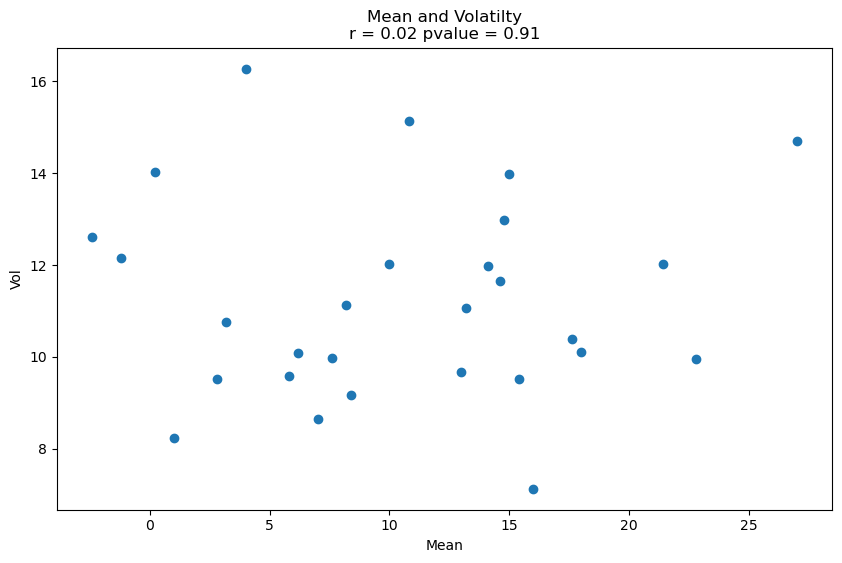

In [1698]:
dfPhils = dfPhils.groupby("Pitcher").mean(numeric_only = True)
fig , ax = plt.subplots(figsize = (10,6))
ax.scatter(dfPhils["Pitcher_SeasonMean"],  dfPhils["Vol"] )

correlation, p_value = pearsonr(dfPhils["Pitcher_SeasonMean"],  dfPhils["Vol"])


correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Mean and Volatilty\nr = {correlation} pvalue = {p_value}", xlabel = "Mean", 
       ylabel = "Vol",) #ylim = (-1000, 1000))
plt.show()



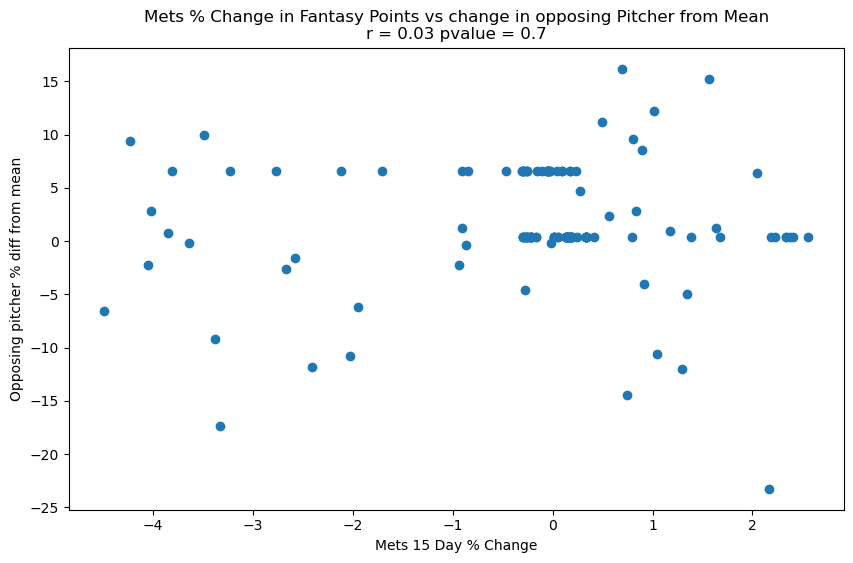

In [1660]:
dfMets = compare_change_and_pitcher_perf(121)
fig , ax = plt.subplots(figsize = (10,6))
ax.scatter(dfMets["Team_Change_5"],  dfMets["PerfDiff"] )

correlation, p_value = pearsonr(dfMets["Team_Change_5"],  dfMets["PerfDiff"])


correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"Mets % Change in Fantasy Points vs change in opposing Pitcher from Mean\nr = {correlation} pvalue = {p_value}", xlabel = "Mets 15 Day % Change", 
       ylabel = "Opposing pitcher % diff from mean",) #ylim = (-1000, 1000))
plt.show()

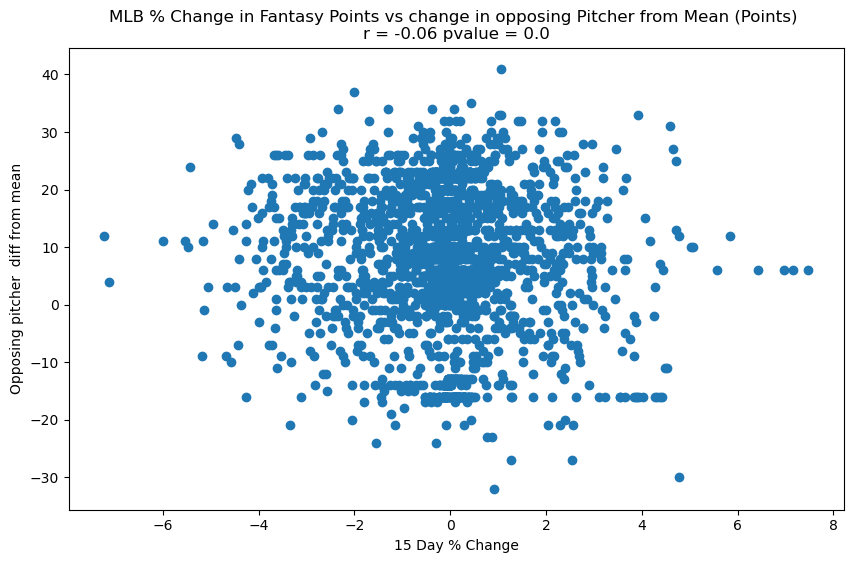

In [1604]:

fig , ax = plt.subplots(figsize = (10,6))
ax.scatter(MLBPitchingStats["Team_Change_5"],  MLBPitchingStats["Pitcher_Perf"] )

correlation, p_value = pearsonr(MLBPitchingStats["Team_Change_5"],  MLBPitchingStats["Pitcher_Perf"])


correlation = round(correlation,2)

p_value = round(p_value,2)

ax.set(title = f"MLB % Change in Fantasy Points vs change in opposing Pitcher from Mean (Points) \nr = {correlation} pvalue = {p_value}", xlabel = "15 Day % Change", 
       ylabel = "Opposing pitcher  diff from mean",) #ylim = (-1000, 1000))
plt.show()

In [1588]:
def hotNotHot(num):
    if num <= 0 :
        return "Not Hot"
    else:
        return "Hot"

In [1590]:
MLBPitchingStats["Hot"] = MLBPitchingStats["Team_Change_5"].apply(hotNotHot)

In [1592]:
MLBPitchingStatsNegativeChange = MLBPitchingStats[MLBPitchingStats["Team_Change_5"] < 0]
MLBPitchingStatsNegativeChange[MLBPitchingStatsNegativeChange['PerfDiff'] > 0].count()


Date                  682
Team_Change_5         682
Pitcher               682
Pitcher_Perf          682
Pitcher_SeasonMean    682
PerfDiff              682
Hot                   682
dtype: int64

In [1594]:
MLBPitchingStatsNegativeChange


,Date,Team_Change_5,Pitcher,Pitcher_Perf,Pitcher_SeasonMean,PerfDiff,Hot
0,2025-04-13,-0.071667,Kodai Senga,24.0,12.222222,11.777778,Not Hot
12,2025-04-28,-0.280000,Patrick Corbin,2.0,8.714286,-6.714286,Not Hot
13,2025-04-29,-0.970000,Jacob deGrom,26.0,15.869565,10.130435,Not Hot
14,2025-04-30,-1.470000,Nathan Eovaldi,18.0,18.526316,-0.526316,Not Hot
15,2025-05-01,-1.950000,Tyler Mahle,11.0,12.500000,-1.500000,Not Hot
...,...,...,...,...,...,...,...
2533,2025-07-26,-3.380000,Robbie Ray,3.0,14.333333,-11.333333,Not Hot
2534,2025-07-27,-3.850000,Matt Gage,4.0,3.266667,0.733333,Not Hot
2535,2025-07-29,-4.050000,Ryan Bergert,8.0,7.333333,0.666667,Not Hot
2536,2025-08-01,-4.230000,Robbie Ray,20.0,14.333333,5.666667,Not Hot


In [1576]:
682 / 1283

0.5315666406858924

In [1596]:
MLBPitchingStatsPositiveChange = MLBPitchingStats[MLBPitchingStats["Team_Change_5"] > 0]
MLBPitchingStatsPositiveChange[MLBPitchingStatsPositiveChange['PerfDiff'] > 0].count()

Date                  661
Team_Change_5         661
Pitcher               661
Pitcher_Perf          661
Pitcher_SeasonMean    661
PerfDiff              661
Hot                   661
dtype: int64

In [1598]:
MLBPitchingStatsPositiveChange

,Date,Team_Change_5,Pitcher,Pitcher_Perf,Pitcher_SeasonMean,PerfDiff,Hot
1,2025-04-15,0.474048,Sean Burke,-11.0,6.826087,-17.826087,Hot
2,2025-04-16,0.782381,Jonathan Cannon,12.0,4.473684,7.526316,Hot
3,2025-04-17,1.010714,Davis Martin,-3.0,6.764706,-9.764706,Hot
4,2025-04-18,0.870714,Freddy Peralta,17.0,14.000000,3.000000,Hot
5,2025-04-19,0.764048,Chad Patrick,9.0,8.526316,0.473684,Hot
...,...,...,...,...,...,...,...
2523,2025-07-10,0.330000,Charlie Morton,13.0,5.200000,7.800000,Hot
2524,2025-07-11,0.490000,Michael Wacha,13.0,9.913043,3.086957,Hot
2525,2025-07-12,0.830000,Angel Zerpa,4.0,2.408163,1.591837,Hot
2526,2025-07-13,0.890000,Noah Cameron,19.0,13.250000,5.750000,Hot


In [1582]:
661 / 1248

0.5296474358974359

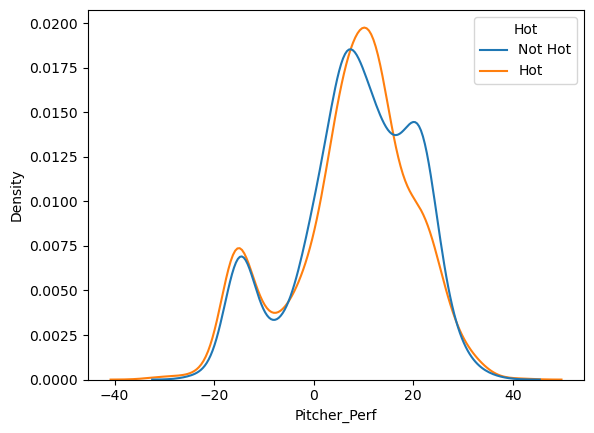

In [1612]:
import seaborn as sns
sns.kdeplot(data = MLBPitchingStats , x = "Pitcher_Perf", hue = "Hot") 
plt.show()

In [1608]:
MLBPitchingStats.groupby("Hot").mean(numeric_only = True)

,Team_Change_5,Pitcher_Perf,Pitcher_SeasonMean,PerfDiff
Hot,,,,
Hot,0.857421,7.443910,7.582081,-0.138171
Not Hot,-0.981672,8.396124,8.469142,-0.073018


In [1616]:
MLBPitchingStats[MLBPitchingStats["Pitcher"] == "Kodai Senga"]

,Date,Team_Change_5,Pitcher,Pitcher_Perf,Pitcher_SeasonMean,PerfDiff,Hot
0,2025-04-13,-0.071667,Kodai Senga,24.0,12.222222,11.777778,Not Hot
1369,2025-08-08,-0.900000,Kodai Senga,3.0,12.222222,-9.222222,Not Hot
1408,2025-07-21,-1.480000,Kodai Senga,-1.0,12.222222,-13.222222,Not Hot
1424,2025-05-01,-0.908254,Kodai Senga,3.0,12.222222,-9.222222,Not Hot
1430,2025-05-07,-0.780000,Kodai Senga,20.0,12.222222,7.777778,Not Hot
1620,2025-05-19,-1.430000,Kodai Senga,4.0,12.222222,-8.222222,Not Hot
1956,2025-05-31,-1.330000,Kodai Senga,23.0,12.222222,10.777778,Not Hot
1958,2025-06-06,-1.760000,Kodai Senga,15.0,12.222222,2.777778,Not Hot
2199,2025-07-11,-1.440000,Kodai Senga,10.0,12.222222,-2.222222,Not Hot
2277,2025-05-25,3.283333,Kodai Senga,15.0,12.222222,2.777778,Hot


In [1666]:
getPitchingLog("Edward Cabrera")["Edward Cabrera"].mean()

12.35

In [1780]:
MLBPitchers = MLBPitchingStats.groupby("Pitcher").mean(numeric_only = True)
mlbStartingPitchers = list(MLBPitchers.index)
MLBPitchers

,Team_Change_5,Pitcher_Perf,Pitcher_SeasonMean,PerfDiff
Pitcher,,,,
AJ Blubaugh,0.300000,3.000000,10.000000,-7.000000
AJ Smith-Shawver,0.225132,10.333333,8.777778,1.555556
Aaron Bummer,-0.605000,0.000000,2.076923,-2.076923
Aaron Civale,-1.152857,13.714286,5.600000,8.114286
Aaron Nola,-0.265000,12.500000,3.111111,9.388889
...,...,...,...,...
Zac Gallen,0.207495,6.875000,7.500000,-0.625000
Zach Eflin,-0.366842,2.526316,5.285714,-2.759398
Zack Littell,-0.587426,8.000000,11.347826,-3.347826


In [1782]:
def getPitchingLogTeam(team_id):
    names = getPitchers(team_id)
    df = pd.DataFrame({"Pitcher" : names })
    df["Mean"] = df["Pitcher"].apply(getPitchingMean)
    df["Vol"] = df["Pitcher"].apply(getPitchingVol)

    return df




In [1790]:
mlbPitchingData = pd.DataFrame({"Pitcher" : mlbStartingPitchers })
mlbPitchingData['Mean'] = mlbPitchingData['Pitcher'].apply(getPitchingMean)
mlbPitchingData['Vol'] = mlbPitchingData['Pitcher'].apply(getPitchingVol)

    

,Pitcher,Mean,Vol
0,AJ Blubaugh,10.000000,9.899495
1,AJ Smith-Shawver,8.777778,14.219509
2,Aaron Bummer,2.153846,4.670954
3,Aaron Civale,5.600000,12.938315
4,Aaron Nola,3.111111,14.277994
...,...,...,...
259,Zac Gallen,7.500000,13.519712
260,Zach Eflin,5.285714,15.106945
261,Zack Littell,10.875000,9.620235
262,Zack Wheeler,18.608696,11.420632


In [1798]:
mlbPitchingData = mlbPitchingData.dropna().copy()
mlbPitchingData

,Pitcher,Mean,Vol,kmeans label
0,AJ Blubaugh,10.000000,9.899495,2
1,AJ Smith-Shawver,8.777778,14.219509,1
2,Aaron Bummer,2.153846,4.670954,0
3,Aaron Civale,5.600000,12.938315,1
4,Aaron Nola,3.111111,14.277994,1
...,...,...,...,...
259,Zac Gallen,7.500000,13.519712,1
260,Zach Eflin,5.285714,15.106945,1
261,Zack Littell,10.875000,9.620235,2
262,Zack Wheeler,18.608696,11.420632,2


In [1800]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(mlbPitchingData[["Mean" , "Vol" ]])
mlbPitchingData['kmeans label'] = kmeans.labels_

mlbPitchingData

,Pitcher,Mean,Vol,kmeans label
0,AJ Blubaugh,10.000000,9.899495,2
1,AJ Smith-Shawver,8.777778,14.219509,0
2,Aaron Bummer,2.153846,4.670954,1
3,Aaron Civale,5.600000,12.938315,0
4,Aaron Nola,3.111111,14.277994,0
...,...,...,...,...
259,Zac Gallen,7.500000,13.519712,0
260,Zach Eflin,5.285714,15.106945,0
261,Zack Littell,10.875000,9.620235,2
262,Zack Wheeler,18.608696,11.420632,2


In [30]:
fig , ax = plt.subplots()
ax.scatter(mlbPitchingData["Vol"] , mlbPitchingData["Mean"], c = mlbPitchingData["kmeans label"])
ax.set(title = "Mean vs Vol MLB StartingPitchers \n n = 263", xlabel = "Vol" , ylabel = "Mean" )



NameError: name 'plt' is not defined

In [1814]:
mlbPitchingData.groupby("kmeans label").mean(numeric_only = True)


,Mean,Vol
kmeans label,,
0,6.468940,12.093670
1,2.259214,6.400751
2,13.220467,10.638752


In [1832]:
mlbPitchingData[mlbPitchingData["kmeans label"] == 0].sort_values(by = "Mean", ascending = False)


,Pitcher,Mean,Vol,kmeans label
57,Chris Bassitt,10.120000,13.055395,0
245,Troy Melton,10.000000,12.727922,0
83,Dylan Cease,9.833333,11.578341,0
63,Cole Ragans,9.800000,13.364962,0
121,Jameson Taillon,9.705882,13.447884,0
...,...,...,...,...
23,Bowden Francis,2.285714,12.560185,0
97,Germán Márquez,2.150000,12.995040,0
237,Tanner Houck,-0.444444,19.112242,0
25,Bradley Blalock,-0.800000,14.718092,0


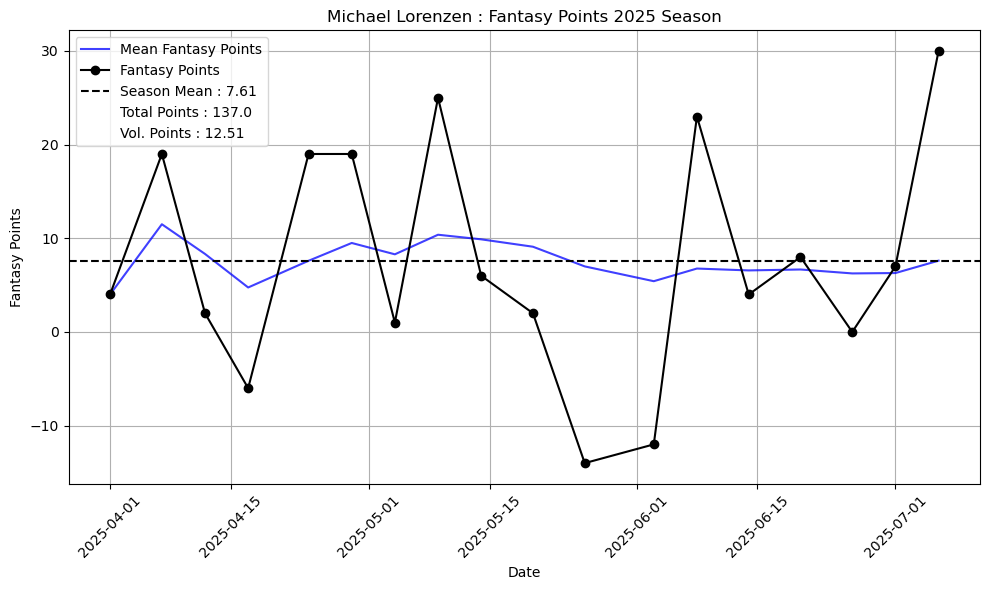

In [52]:
plotFantasyPointsPitcher("Michael Lorenzen")